<span style="background-color: #FFFF00"><h1> Notebook 2</h1> </span>

**Project: "Intra-Regional Migration and Transportation in New York Metro Area"**

***Due to the large data our team is working with, there are a total of four notebooks submitted for this midterm (Two from each team member)</font>***

***I also outlined the notebook into the Table of Content - hope it helps to read through the notebook</font>***

<h2>
<code style="background:grey;color:black">Research questions in this specific notebook:
</code>
</h2>

<p>

- **Q1: What is migration out-flow from New York City?** <p>
    - **Expected exploration** <p> 
        - We want to know where New Yorker migrate to at both national and regional scale.
        - We want to know how much people are in the process of migration.<p> 
        - We want to know if the migration trend is changed over the time of 2014-2018.<p> 
        <p> 

- **Q2: What is the change of economic metrics in New York Metro Area (GDP, Income, and Employment)?**<p> 
    
    - **Expected exploration** <p> 
        - We want to know how local GDP, income level, and employment number are changed over the time of 2014 - 2018.
        - We want to know how much changes happened during the same period. <p> 


<h2>
<code style="background:grey;color:black">Section 0. Import All Modules and Set Up Notebook
</code>
</h2>

In [1]:
# Import all modules I will be using in this note book.

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [2]:
# Pre-set some system settings for better working workspace here.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.0f}'.format

<h2>
<code style="background:grey;color:black">Section 1. Prepare Basic Geo-Data
</h2>

In this section, I will clean and prepare basic geo dataset for future use in this notebook. I will work with both SHP file and CSV file to create a list of county in the US with all geo information. Those data are used to be matched with census data and then map the findings. 

In [3]:
# Import the raw data that contains geo information. It is a SHP file.

countyborder = gpd.read_file('data/04_Basemap_countyborder/cb_2018_us_county_500k.shp')

In [4]:
# I want to take a look what it looks like.

countyborder.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      21      007  00516850  0500000US21007  21007  Ballard   06   639387454   
1      21      017  00516855  0500000US21017  21017  Bourbon   06   750439351   
2      21      031  00516862  0500000US21031  21031   Butler   06  1103571974   
3      21      065  00516879  0500000US21065  21065   Estill   06   655509930   
4      21      069  00516881  0500000US21069  21069  Fleming   06   902727151   

     AWATER                                           geometry  
0  69473325  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
1   4829777  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
2  13943044  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
3   6516335  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
4   7182793  POLYGON ((-83.98428 38.44549, -83.98246 38.450...

In [5]:
# Clean out the dataset by keeping the columns I need.

columns_to_keep4 = ['GEOID','geometry','NAME','STATEFP']
countyborder_trimmed1 = countyborder [columns_to_keep4]
countyborder_trimmed1.head()

GEOID                                           geometry     NAME STATEFP
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  Ballard      21
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  Bourbon      21
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...   Butler      21
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...   Estill      21
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  Fleming      21

In [6]:
# The geo data above misses the state name.
# So, I will import anly CSV data that contains the state info with the identifiers (STATEFP).

state_name = pd.read_csv('data/07_Basemap_State_FIPS.csv',dtype={'STATEFP':str})
state_name.head(5)

STATEFP                  Name
0      00      Northeast Region
1      00  New England Division
2      09           Connecticut
3      23                 Maine
4      25         Massachusetts

In [7]:
# I will merge those two geo dataset toeghter according to "STATEFP", the shared identifers

countyborder_trimmed2 = countyborder_trimmed1.merge(state_name,on ='STATEFP',how='left')

countyborder_trimmed2.head()

GEOID                                           geometry     NAME STATEFP  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  Ballard      21   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  Bourbon      21   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...   Butler      21   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...   Estill      21   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  Fleming      21   

       Name  
0  Kentucky  
1  Kentucky  
2  Kentucky  
3  Kentucky  
4  Kentucky

In [8]:
# For better viewing, I create a new column that contains both the county name column and the state name column

countyborder_trimmed2 ['County_Name'] = countyborder_trimmed2['NAME'] + ','+' '+countyborder_trimmed2['Name']

countyborder_trimmed2 = countyborder_trimmed2.drop (['NAME','Name'],axis=1)
countyborder_trimmed2.head()

GEOID                                           geometry STATEFP  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...      21   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...      21   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...      21   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...      21   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...      21   

         County_Name  
0  Ballard, Kentucky  
1  Bourbon, Kentucky  
2   Butler, Kentucky  
3   Estill, Kentucky  
4  Fleming, Kentucky

In [9]:
# Now, I hope to add a "filter" to this dataset for easier handling later.
# I create a column called "Region". The value in this column is given according to "GEOID"
# There are 31 counties or GEOID code that are part of "NYC_Metro". Anything with this code will be noted as "NYC_Metro"
# Simiarlly, the values are given based on the information from other columns

countyborder_trimmed2['Region'] = 'Non_Metro_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '09001','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '09005','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '09009','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34003','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34013','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34017','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34019','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34021','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34023','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34025','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34027','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34029','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34031','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34035','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34037','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34039','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36005','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36027','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36047','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36059','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36061','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36071','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36079','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36081','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36085','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36087','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36103','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36111','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36119','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '42089','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '42103','Region'] = 'NYC_Metro'

countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '72','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '02','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '15','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '66','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '69','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '78','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '60','Region'] = 'Non_the_contiguous_US'

countyborder_trimmed2.head()

GEOID                                           geometry STATEFP  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...      21   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...      21   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...      21   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...      21   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...      21   

         County_Name                       Region  
0  Ballard, Kentucky  Non_Metro_the_contiguous_US  
1  Bourbon, Kentucky  Non_Metro_the_contiguous_US  
2   Butler, Kentucky  Non_Metro_the_contiguous_US  
3   Estill, Kentucky  Non_Metro_the_contiguous_US  
4  Fleming, Kentucky  Non_Metro_the_contiguous_US

<h3>
<code style="background:grey;color:red">The Follwing Dataset is Ready: List of All US Counties with Geo Info:
</code>
</h3>

In [10]:
# I don't need "STATEFP" column anymore. Now I'm gonna drop it for clearning.

county_geodata_ready = countyborder_trimmed2.drop(['STATEFP'],axis=1)

county_geodata_ready.head()

GEOID                                           geometry  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...   

         County_Name                       Region  
0  Ballard, Kentucky  Non_Metro_the_contiguous_US  
1  Bourbon, Kentucky  Non_Metro_the_contiguous_US  
2   Butler, Kentucky  Non_Metro_the_contiguous_US  
3   Estill, Kentucky  Non_Metro_the_contiguous_US  
4  Fleming, Kentucky  Non_Metro_the_contiguous_US

<h3>
<code style="background:grey;color:red">The Following Dataset is Ready: List of NYC Metro Counties with Geo Info:
</code>
</h3>

In [11]:
# I want to create a new dataframe that only contains the geo data for NYC_Metro.
# This is especially important when I am going to map out the findings just for NYC_Metro. 

NYCMetro_5county_geodata_ready = county_geodata_ready[county_geodata_ready.Region =='NYC_Metro']

NYCMetro_5county_geodata_ready = NYCMetro_5county_geodata_ready.reset_index(drop=True)

NYCMetro_5county_geodata_ready

GEOID                                           geometry  \
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   

                County_Name     Region  
0    New Haven, Connecticut  NYC_Metro  
1        Bergen, New Jersey  NYC_Metro  
2         Essex, New Jersey  NYC_Metro  
3     Middlesex, New Jersey  NYC_Metro  
4           Kings, New York  NYC_Metro  
5          Queens, New York  NYC_Metro  
6     Hunterdon, New Jersey  NYC_Metro  
7        Mercer, New Jersey  NYC_Metro  
8      Monmouth, New Jersey  NYC_Metro  
9         Ocean, New Jersey  NYC_Metro  
10     Somerset, New Jersey  NYC_Metro  
11        Suffolk, New York  NYC_Metro  
12    Westchester, New York  NYC_Metro  
13       Pike, Pennsylvania  NYC_Metro  
14   Fairfield, Connecticut  NYC_Metro  
15     Monroe, Pennsylvania  NYC_Metro  
16         Nassau, New York  NYC_Metro  
17       Morris, New Jersey  NYC_Metro  
18      Passaic, New Jersey  NYC_Metro  
19       New York, New York  NYC_Metro  
20         Orange, New York  NYC_Metro  
21  Litchfield, Connecticut  NYC_Metro  
22         Putnam, New York  NYC_Metro  
23       Sussex, New Jersey  NYC_Metro  
24       Richmond, New York  NYC_Metro  
25       Dutchess, New York  NYC_Metro  
26        Union, New Jersey  NYC_Metro  
27          Bronx, New York  NYC_Metro  
28       Hudson, New Jersey  NYC_Metro  
29         Ulster, New York  NYC_Metro  
30       Rockland, New York  NYC_Metro

<h2>
<code style="background:grey;color:black">Section 2. Analyze Out-Migration Pattern in New Yorm Metro Area
</code>
</h2>

In this section, I will be processing the census data for 2014 and 2018. All files are CSV file. I have to clean, sort, group, and then process them. 

I will begin with the individual year data first. Then I will put the two year data side-by-side to compare

<h3>
<code style="background:grey;color:black">Section 2.1 Prepare Migration Dataset for 2014
</code>
</h3>

In [12]:
# First, I will imporat the migration data. It is a CSV file that contains all migration data for who used to live in NY State

migration2014_rawdata = pd.read_csv('data/08_Migration_nycToOtherCounty_2014.csv',
                                   dtype={
                                       'Current Residence State Code':str,
                                       'Current Residence FIPS County Code':str,
                                       'Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code':str,
                                       'Residence 1 Year Ago FIPS County Code':str,
                                   }
                                   )

In [13]:
# I want to take a look what it looks like

migration2014_rawdata.head()

Current Residence State Code Current Residence FIPS County Code  \
0                           01                                081   
1                           02                                050   
2                           04                                001   
3                           04                                003   
4                           04                                013   

  Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code  \
0                                                 36                
1                                                 36                
2                                                 36                
3                                                 36                
4                                                 36                

  Residence 1 Year Ago FIPS County Code State of Current Residence  \
0                                   001                    Alabama   
1                                   001                     Alaska   
2                                   001                    Arizona   
3                                   001                    Arizona   
4                                   001                    Arizona   

  County of Current Residence  Population 1 Year and Over  Nonmovers  \
0                  Lee County                     146,149    111,096   
1          Bethel Census Area                      17,220     14,802   
2               Apache County                      71,088     65,354   
3              Cochise County                     129,300    104,988   
4             Maricopa County                   3,895,703  3,145,207   

   Movers within United States or Puerto Rico1  Movers within Same County  \
0                                       33,873                     17,795   
1                                        2,415                      1,648   
2                                        5,563                      2,436   
3                                       22,812                     10,535   
4                                      726,044                    553,063   

   Movers from Different County, Same State  Movers from Different State  \
0                                     8,700                        7,378   
1                                       464                          303   
2                                     1,810                        1,317   
3                                     4,667                        7,610   
4                                    39,944                      133,037   

   Movers from Abroad2  \
0                1,180   
1                    3   
2                  171   
3                1,500   
4               24,452   

  State/U.S. Island Area/Foreign Region of Residence 1 Year Ago  \
0                                           New York              
1                                           New York              
2                                           New York              
3                                           New York              
4                                           New York              

  County of Residence 1 Year Ago  Population 1 Year and Over.1  Nonmovers.1  \
0                  Albany County                       300,571      259,509   
1                  Albany County                       300,571      259,509   
2                  Albany County                       300,571      259,509   
3                  Albany County                       300,571      259,509   
4                  Albany County                       300,571      259,509   

   Movers within United States  Movers within Same County.1  \
0                       41,017                       22,074   
1                       41,017                       22,074   
2                       41,017                       22,074   
3                       41,017                       22,074   
4                       41,017                  

In [14]:
# I want to see the data info and make sure the numbers are in number type while the GEOID code is in object code.

migration2014_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Current Residence State Code                                     10114 non-null  object 
 1   Current Residence FIPS County Code                               10108 non-null  object 
 2   Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code  10108 non-null  object 
 3   Residence 1 Year Ago FIPS County Code                            10108 non-null  object 
 4   State of Current Residence                                       10108 non-null  object 
 5   County of Current Residence                                      10108 non-null  object 
 6   Population 1 Year and Over                                       10108 non-null  float64
 7   Nonmovers                               

In [15]:
# I want to keep the columns that are only useful to our project.
# Also, GEOID is the important FIPS identifier for me to match geo data and census data.
# GEOID now is divided to two columns. So, I have to combine them to make a complete and standard GEOID FIPS code.

column_to_keep1=['Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code',
                 'Residence 1 Year Ago FIPS County Code',
                 'State/U.S. Island Area/Foreign Region of Residence 1 Year Ago',
                 'County of Residence 1 Year Ago',
                 'Current Residence State Code',
                 'Current Residence FIPS County Code',
                 'State of Current Residence',
                 'County of Current Residence',
                 'Movers in County-to-County Flow',
                 'Population 1 Year and Over.1',
                 'Nonmovers.1'
                ]
migration2014_rawdata_trimmed1 = migration2014_rawdata[column_to_keep1]

migration2014_rawdata_trimmed1 ['GEOID'] = migration2014_rawdata_trimmed1['Current Residence State Code']+ migration2014_rawdata_trimmed1['Current Residence FIPS County Code']

migration2014_rawdata_trimmed1.head()

<ipython-input-15-3ecc8f4585e6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration2014_rawdata_trimmed1 ['GEOID'] = migration2014_rawdata_trimmed1['Current Residence State Code']+ migration2014_rawdata_trimmed1['Current Residence FIPS County Code']


Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code  \
0                                                 36                
1                                                 36                
2                                                 36                
3                                                 36                
4                                                 36                

  Residence 1 Year Ago FIPS County Code  \
0                                   001   
1                                   001   
2                                   001   
3                                   001   
4                                   001   

  State/U.S. Island Area/Foreign Region of Residence 1 Year Ago  \
0                                           New York              
1                                           New York              
2                                           New York              
3                                           New York              
4                                           New York              

  County of Residence 1 Year Ago Current Residence State Code  \
0                  Albany County                           01   
1                  Albany County                           02   
2                  Albany County                           04   
3                  Albany County                           04   
4                  Albany County                           04   

  Current Residence FIPS County Code State of Current Residence  \
0                                081                    Alabama   
1                                050                     Alaska   
2                                001                    Arizona   
3                                003                    Arizona   
4                                013                    Arizona   

  County of Current Residence  Movers in County-to-County Flow  \
0                  Lee County                               21   
1          Bethel Census Area                               15   
2               Apache County                               29   
3              Cochise County                               30   
4             Maricopa County                              121   

   Population 1 Year and Over.1  Nonmovers.1  GEOID  
0                       300,571      259,509  01081  
1                       300,571      259,509  02050  
2                       300,571      259,509  04001  
3                       300,571      259,509  04003  
4                       300,571      259,509  04013

In [16]:
# To make it easier to read, I rename this dataset.

migration2014_rawdata_trimmed1.columns = ['Previous_State_Code',
                                         'Previous_County_Code',
                                         'Previous_State',
                                         'Previous_County',
                                         'Current_State_Code',
                                         'Current_County_Code',
                                         'Current_State',
                                         'Current_County',
                                         'Out_Migration_Population',
                                         'Previous_County_Total_Population',
                                          'Previous_County_Nonmovers',
                                          'GEOID'
                                          ]
migration2014_rawdata_trimmed1.head()

Previous_State_Code Previous_County_Code Previous_State Previous_County  \
0                  36                  001       New York   Albany County   
1                  36                  001       New York   Albany County   
2                  36                  001       New York   Albany County   
3                  36                  001       New York   Albany County   
4                  36                  001       New York   Albany County   

  Current_State_Code Current_County_Code Current_State      Current_County  \
0                 01                 081       Alabama          Lee County   
1                 02                 050        Alaska  Bethel Census Area   
2                 04                 001       Arizona       Apache County   
3                 04                 003       Arizona      Cochise County   
4                 04                 013       Arizona     Maricopa County   

   Out_Migration_Population  Previous_County_Total_Population  \
0                        21                           300,571   
1                        15                           300,571   
2                        29                           300,571   
3                        30                           300,571   
4                       121                           300,571   

   Previous_County_Nonmovers  GEOID  
0                    259,509  01081  
1                    259,509  02050  
2                    259,509  04001  
3                    259,509  04003  
4                    259,509  04013

In [17]:
# Re-check the dataset to make sure all data are in the right type and no null values.

migration2014_rawdata_trimmed1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Previous_State_Code               10108 non-null  object 
 1   Previous_County_Code              10108 non-null  object 
 2   Previous_State                    10108 non-null  object 
 3   Previous_County                   10108 non-null  object 
 4   Current_State_Code                10114 non-null  object 
 5   Current_County_Code               10108 non-null  object 
 6   Current_State                     10108 non-null  object 
 7   Current_County                    10108 non-null  object 
 8   Out_Migration_Population          10108 non-null  float64
 9   Previous_County_Total_Population  10108 non-null  float64
 10  Previous_County_Nonmovers         10108 non-null  float64
 11  GEOID                             10108 non-null  object 
dtypes: f

In [18]:
# I want to create a column that make some categoires for this dataset.
# I want to sort those data by NYC. Therefore, I create a new dataframe for all five counties in NYC.
# And then, I re-name all columns to make it easier to read.

migration2014_NewYorkNY_rawdata = migration2014_rawdata_trimmed1[migration2014_rawdata_trimmed1.Previous_County =='New York County']
migration2014_BronxNY_rawdata = migration2014_rawdata_trimmed1[migration2014_rawdata_trimmed1.Previous_County =='Bronx County']
migration2014_KingsNY_rawdata = migration2014_rawdata_trimmed1[migration2014_rawdata_trimmed1.Previous_County =='Kings County']
migration2014_QueensNY_rawdata = migration2014_rawdata_trimmed1[migration2014_rawdata_trimmed1.Previous_County =='Queens County']
migration2014_RichmondNY_rawdata = migration2014_rawdata_trimmed1[migration2014_rawdata_trimmed1.Previous_County =='Richmond County']

NY_five_counties_descriptionset2014 = [migration2014_NewYorkNY_rawdata,
                               migration2014_BronxNY_rawdata,
                               migration2014_KingsNY_rawdata,
                               migration2014_QueensNY_rawdata,
                               migration2014_RichmondNY_rawdata]

NY_five_counties2014 = pd.concat(NY_five_counties_descriptionset2014)

NY_five_counties2014.head()

Previous_State_Code Previous_County_Code Previous_State  Previous_County  \
4695                  36                  061       New York  New York County   
4696                  36                  061       New York  New York County   
4697                  36                  061       New York  New York County   
4698                  36                  061       New York  New York County   
4699                  36                  061       New York  New York County   

     Current_State_Code Current_County_Code Current_State    Current_County  \
4695                 01                 015       Alabama    Calhoun County   
4696                 01                 031       Alabama     Coffee County   
4697                 01                 033       Alabama    Colbert County   
4698                 01                 047       Alabama     Dallas County   
4699                 01                 073       Alabama  Jefferson County   

      Out_Migration_Population  Previous_County_Total_Population  \
4695                        19                         1,577,378   
4696                         9                         1,577,378   
4697                         9                         1,577,378   
4698                         5                         1,577,378   
4699                        30                         1,577,378   

      Previous_County_Nonmovers  GEOID  
4695                  1,338,628  01015  
4696                  1,338,628  01031  
4697                  1,338,628  01033  
4698                  1,338,628  01047  
4699                  1,338,628  01073

<h3>
<code style="background:grey;color:red">The Following Dataset is Ready: 2014 Out-Migration Population Who Used to Be New Yorkers:
</code>
</h3>

In [19]:
# Simiarlly, I want to create a new column that shows which region each county is.
# I identify the region by "GEOID" or the "State Code".

NY_five_counties2014['Region'] = 'Non_Metro_the_contiguous_US'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '09001','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '09005','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '09009','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34003','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34013','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34017','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34019','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34021','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34023','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34025','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34027','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34029','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34031','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34035','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34037','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '34039','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36005','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36027','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36047','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36059','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36061','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36071','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36079','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36081','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36085','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36087','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36103','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36111','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '36119','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '42089','Region'] = 'NYC_Metro'
NY_five_counties2014.loc[NY_five_counties2014['GEOID'] == '42103','Region'] = 'NYC_Metro'

NY_five_counties2014.loc[NY_five_counties2014['Current_State_Code'] == '72','Region'] = 'Non_the_contiguous_US'
NY_five_counties2014.loc[NY_five_counties2014['Current_State_Code'] == '02','Region'] = 'Non_the_contiguous_US'
NY_five_counties2014.loc[NY_five_counties2014['Current_State_Code'] == '15','Region'] = 'Non_the_contiguous_US'

NY_five_counties2014.head()

Previous_State_Code Previous_County_Code Previous_State  Previous_County  \
4695                  36                  061       New York  New York County   
4696                  36                  061       New York  New York County   
4697                  36                  061       New York  New York County   
4698                  36                  061       New York  New York County   
4699                  36                  061       New York  New York County   

     Current_State_Code Current_County_Code Current_State    Current_County  \
4695                 01                 015       Alabama    Calhoun County   
4696                 01                 031       Alabama     Coffee County   
4697                 01                 033       Alabama    Colbert County   
4698                 01                 047       Alabama     Dallas County   
4699                 01                 073       Alabama  Jefferson County   

      Out_Migration_Population  Previous_County_Total_Population  \
4695                        19                         1,577,378   
4696                         9                         1,577,378   
4697                         9                         1,577,378   
4698                         5                         1,577,378   
4699                        30                         1,577,378   

      Previous_County_Nonmovers  GEOID                       Region  
4695                  1,338,628  01015  Non_Metro_the_contiguous_US  
4696                  1,338,628  01031  Non_Metro_the_contiguous_US  
4697                  1,338,628  01033  Non_Metro_the_contiguous_US  
4698                  1,338,628  01047  Non_Metro_the_contiguous_US  
4699                  1,338,628  01073  Non_Metro_the_contiguous_US

<h3>
<code style="background:grey;color:black">Section 2.2 Prepare Migration Dataset for 2018
</code>
</h3>

In [20]:
# Simiarly, I will process the migration data for 2018.
# The step shall be same as the 2014's.

migration2018_rawdata = pd.read_csv('data/09_Migration_nycToOtherCounty_2018.csv',
                                   dtype={
                                       'Current Residence State Code':str,
                                       'Current Residence FIPS County Code':str,
                                       'Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code':str,
                                       'Residence 1 Year Ago FIPS County Code':str,
                                   }
                                   )

In [21]:
# I want to take a look what it looks like:

migration2018_rawdata.head()

Current Residence State Code Current Residence FIPS County Code  \
0                           01                                103   
1                           02                                090   
2                           02                                220   
3                           04                                001   
4                           04                                003   

  Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code  \
0                                                 36                
1                                                 36                
2                                                 36                
3                                                 36                
4                                                 36                

  Residence 1 Year Ago FIPS County Code State of Current Residence  \
0                                   001                    Alabama   
1                                   001                     Alaska   
2                                   001                     Alaska   
3                                   001                    Arizona   
4                                   001                    Arizona   

    County of Current Residence  Population 1 Year and Over  Nonmovers  \
0                 Morgan County                     117,789    102,817   
1  Fairbanks North Star Borough                      97,893     76,743   
2        Sitka City and Borough                       8,663      6,880   
3                 Apache County                      70,666     65,794   
4                Cochise County                     124,759    103,113   

   Movers within United States or Puerto Rico1  Movers within Same County  \
0                                       14,892                      9,680   
1                                       20,318                     11,348   
2                                        1,713                        855   
3                                        4,784                      2,551   
4                                       20,664                      8,983   

   Movers from Different County, Same State  Movers from Different State  \
0                                     3,372                        1,840   
1                                     1,930                        7,040   
2                                       479                          379   
3                                     1,580                          653   
4                                     5,122                        6,559   

   Movers from Abroad2  \
0                   80   
1                  832   
2                   70   
3                   88   
4                  982   

  State/U.S. Island Area/Foreign Region of Residence 1 Year Ago  \
0                                           New York              
1                                           New York              
2                                           New York              
3                                           New York              
4                                           New York              

  County of Residence 1 Year Ago  Population 1 Year and Over.1  Nonmovers.1  \
0                  Albany County                       301,907      257,590   
1                  Albany County                       301,907      257,590   
2                  Albany County                       301,907      257,590   
3                  Albany County                       301,907      257,590   
4                  Albany County                       301,907      257,590   

   Movers within United States  Movers within Same County.1  \
0                       44,317                       24,591   
1                       44,317                       24,591   
2                       44,317                       24,591   
3                       44,317                       24,591   
4                       44,317      

In [22]:
# I want to make sure all data are in the right type with valid values.
# I found some values are null. They are 0 or no values in this case. They are not central to our research questions.
# So I treat them like 0 and hence disregard the null values.

migration2018_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9956 entries, 0 to 9955
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Current Residence State Code                                     9956 non-null   object 
 1   Current Residence FIPS County Code                               9950 non-null   object 
 2   Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code  9950 non-null   object 
 3   Residence 1 Year Ago FIPS County Code                            9950 non-null   object 
 4   State of Current Residence                                       9950 non-null   object 
 5   County of Current Residence                                      9950 non-null   object 
 6   Population 1 Year and Over                                       9950 non-null   float64
 7   Nonmovers                                 

In [23]:
# I want to keep the columns that are important to us.
# Also, I want to complete standard GEOID, which is FICO by combining two columns together.

column_to_keep5=['Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code',
                 'Residence 1 Year Ago FIPS County Code',
                 'State/U.S. Island Area/Foreign Region of Residence 1 Year Ago',
                 'County of Residence 1 Year Ago',
                 'Current Residence State Code',
                 'Current Residence FIPS County Code',
                 'State of Current Residence',
                 'County of Current Residence',
                 'Movers in County-to-County Flow',
                 'Population 1 Year and Over.1',
                 'Nonmovers.1'
                ]
migration2018_rawdata_trimmed1 = migration2018_rawdata[column_to_keep5]

migration2018_rawdata_trimmed1 ['GEOID'] = migration2018_rawdata_trimmed1['Current Residence State Code']+ migration2018_rawdata_trimmed1['Current Residence FIPS County Code']

migration2018_rawdata_trimmed1.head()

<ipython-input-23-172e49b35314>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration2018_rawdata_trimmed1 ['GEOID'] = migration2018_rawdata_trimmed1['Current Residence State Code']+ migration2018_rawdata_trimmed1['Current Residence FIPS County Code']


Residence 1 Year Ago State/U.S. Island Area/Foreign Region Code  \
0                                                 36                
1                                                 36                
2                                                 36                
3                                                 36                
4                                                 36                

  Residence 1 Year Ago FIPS County Code  \
0                                   001   
1                                   001   
2                                   001   
3                                   001   
4                                   001   

  State/U.S. Island Area/Foreign Region of Residence 1 Year Ago  \
0                                           New York              
1                                           New York              
2                                           New York              
3                                           New York              
4                                           New York              

  County of Residence 1 Year Ago Current Residence State Code  \
0                  Albany County                           01   
1                  Albany County                           02   
2                  Albany County                           02   
3                  Albany County                           04   
4                  Albany County                           04   

  Current Residence FIPS County Code State of Current Residence  \
0                                103                    Alabama   
1                                090                     Alaska   
2                                220                     Alaska   
3                                001                    Arizona   
4                                003                    Arizona   

    County of Current Residence  Movers in County-to-County Flow  \
0                 Morgan County                               14   
1  Fairbanks North Star Borough                               21   
2        Sitka City and Borough                                4   
3                 Apache County                               18   
4                Cochise County                               14   

   Population 1 Year and Over.1  Nonmovers.1  GEOID  
0                       301,907      257,590  01103  
1                       301,907      257,590  02090  
2                       301,907      257,590  02220  
3                       301,907      257,590  04001  
4                       301,907      257,590  04003

In [24]:
# Rename them for easier reviewing.

migration2018_rawdata_trimmed1.columns = ['Previous_State_Code',
                                         'Previous_County_Code',
                                         'Previous_State',
                                         'Previous_County',
                                         'Current_State_Code',
                                         'Current_County_Code',
                                         'Current_State',
                                         'Current_County',
                                         'Out_Migration_Population',
                                         'Previous_County_Total_Population',
                                          'Previous_County_Nonmovers',
                                          'GEOID'
                                          ]
migration2018_rawdata_trimmed1.head()

Previous_State_Code Previous_County_Code Previous_State Previous_County  \
0                  36                  001       New York   Albany County   
1                  36                  001       New York   Albany County   
2                  36                  001       New York   Albany County   
3                  36                  001       New York   Albany County   
4                  36                  001       New York   Albany County   

  Current_State_Code Current_County_Code Current_State  \
0                 01                 103       Alabama   
1                 02                 090        Alaska   
2                 02                 220        Alaska   
3                 04                 001       Arizona   
4                 04                 003       Arizona   

                 Current_County  Out_Migration_Population  \
0                 Morgan County                        14   
1  Fairbanks North Star Borough                        21   
2        Sitka City and Borough                         4   
3                 Apache County                        18   
4                Cochise County                        14   

   Previous_County_Total_Population  Previous_County_Nonmovers  GEOID  
0                           301,907                    257,590  01103  
1                           301,907                    257,590  02090  
2                           301,907                    257,590  02220  
3                           301,907                    257,590  04001  
4                           301,907                    257,590  04003

In [25]:
# Filter out the data for who used to live in NYC's five counties.
# Create a new dataframe for those data because only this dataframe is the data we focus on.

migration2018_NewYorkNY_rawdata = migration2018_rawdata_trimmed1[migration2018_rawdata_trimmed1.Previous_County =='New York County']
migration2018_BronxNY_rawdata = migration2018_rawdata_trimmed1[migration2018_rawdata_trimmed1.Previous_County =='Bronx County']
migration2018_KingsNY_rawdata = migration2018_rawdata_trimmed1[migration2018_rawdata_trimmed1.Previous_County =='Kings County']
migration2018_QueensNY_rawdata = migration2018_rawdata_trimmed1[migration2018_rawdata_trimmed1.Previous_County =='Queens County']
migration2018_RichmondNY_rawdata = migration2018_rawdata_trimmed1[migration2018_rawdata_trimmed1.Previous_County =='Richmond County']

NY_five_counties_descriptionset2018 = [migration2018_NewYorkNY_rawdata,
                               migration2018_BronxNY_rawdata,
                               migration2018_KingsNY_rawdata,
                               migration2018_QueensNY_rawdata,
                               migration2018_RichmondNY_rawdata]

NY_five_counties2018 = pd.concat(NY_five_counties_descriptionset2018)

NY_five_counties2018.head()

Previous_State_Code Previous_County_Code Previous_State  Previous_County  \
4589                  36                  061       New York  New York County   
4590                  36                  061       New York  New York County   
4591                  36                  061       New York  New York County   
4592                  36                  061       New York  New York County   
4593                  36                  061       New York  New York County   

     Current_State_Code Current_County_Code Current_State    Current_County  \
4589                 01                 017       Alabama   Chambers County   
4590                 01                 033       Alabama    Colbert County   
4591                 01                 039       Alabama  Covington County   
4592                 01                 073       Alabama  Jefferson County   
4593                 01                 087       Alabama      Macon County   

      Out_Migration_Population  Previous_County_Total_Population  \
4589                         2                         1,612,761   
4590                        24                         1,612,761   
4591                         1                         1,612,761   
4592                       320                         1,612,761   
4593                         3                         1,612,761   

      Previous_County_Nonmovers  GEOID  
4589                  1,366,886  01017  
4590                  1,366,886  01033  
4591                  1,366,886  01039  
4592                  1,366,886  01073  
4593                  1,366,886  01087

In [26]:
# Simiarlly, I want to put all data into categories by where they are living now, which is where they migrate to.
# Create a new column and give values based on GEOID or State Code.

NY_five_counties2018['Region'] = 'Non_Metro_the_contiguous_US'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '09001','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '09005','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '09009','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34003','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34013','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34017','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34019','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34021','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34023','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34025','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34027','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34029','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34031','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34035','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34037','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '34039','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36005','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36027','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36047','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36059','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36061','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36071','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36079','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36081','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36085','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36087','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36103','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36111','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '36119','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '42089','Region'] = 'NYC_Metro'
NY_five_counties2018.loc[NY_five_counties2018['GEOID'] == '42103','Region'] = 'NYC_Metro'

NY_five_counties2018.loc[NY_five_counties2018['Current_State_Code'] == '72','Region'] = 'Non_the_contiguous_US'
NY_five_counties2018.loc[NY_five_counties2018['Current_State_Code'] == '02','Region'] = 'Non_the_contiguous_US'
NY_five_counties2018.loc[NY_five_counties2018['Current_State_Code'] == '15','Region'] = 'Non_the_contiguous_US'

NY_five_counties2018.head()

Previous_State_Code Previous_County_Code Previous_State  Previous_County  \
4589                  36                  061       New York  New York County   
4590                  36                  061       New York  New York County   
4591                  36                  061       New York  New York County   
4592                  36                  061       New York  New York County   
4593                  36                  061       New York  New York County   

     Current_State_Code Current_County_Code Current_State    Current_County  \
4589                 01                 017       Alabama   Chambers County   
4590                 01                 033       Alabama    Colbert County   
4591                 01                 039       Alabama  Covington County   
4592                 01                 073       Alabama  Jefferson County   
4593                 01                 087       Alabama      Macon County   

      Out_Migration_Population  Previous_County_Total_Population  \
4589                         2                         1,612,761   
4590                        24                         1,612,761   
4591                         1                         1,612,761   
4592                       320                         1,612,761   
4593                         3                         1,612,761   

      Previous_County_Nonmovers  GEOID                       Region  
4589                  1,366,886  01017  Non_Metro_the_contiguous_US  
4590                  1,366,886  01033  Non_Metro_the_contiguous_US  
4591                  1,366,886  01039  Non_Metro_the_contiguous_US  
4592                  1,366,886  01073  Non_Metro_the_contiguous_US  
4593                  1,366,886  01087  Non_Metro_the_contiguous_US

<h3>
<code style="background:grey;color:red">The Following Dataset is Ready: 2018 Out-Migration Population Who Used to Be New Yorkers:
</code>
</h3>

In [27]:
# We want a more detailed group by adding a new column to identify if a county is within NYC or not.

NY_five_counties2018_detail = NY_five_counties2018

NY_five_counties2018_detail ['Detailed_Region'] ='NYC_Metro_Except_NYC'

NY_five_counties2018_detail.loc[NY_five_counties2018_detail['Region'] == 'Non_the_contiguous_US','Detailed_Region'] = 'Non_the_contiguous_US'
NY_five_counties2018_detail.loc[NY_five_counties2018_detail['Region'] == 'Non_Metro_the_contiguous_US','Detailed_Region'] = 'Non_Metro_the_contiguous_US'

NY_five_counties2018_detail.loc[NY_five_counties2018_detail['GEOID'] == '36061','Detailed_Region'] = 'NYC'
NY_five_counties2018_detail.loc[NY_five_counties2018_detail['GEOID'] == '36081','Detailed_Region'] = 'NYC'
NY_five_counties2018_detail.loc[NY_five_counties2018_detail['GEOID'] == '36085','Detailed_Region'] = 'NYC'
NY_five_counties2018_detail.loc[NY_five_counties2018_detail['GEOID'] == '36005','Detailed_Region'] = 'NYC'
NY_five_counties2018_detail.loc[NY_five_counties2018_detail['GEOID'] == '36047','Detailed_Region'] = 'NYC'

NY_five_counties2018_detail.head()

Previous_State_Code Previous_County_Code Previous_State  Previous_County  \
4589                  36                  061       New York  New York County   
4590                  36                  061       New York  New York County   
4591                  36                  061       New York  New York County   
4592                  36                  061       New York  New York County   
4593                  36                  061       New York  New York County   

     Current_State_Code Current_County_Code Current_State    Current_County  \
4589                 01                 017       Alabama   Chambers County   
4590                 01                 033       Alabama    Colbert County   
4591                 01                 039       Alabama  Covington County   
4592                 01                 073       Alabama  Jefferson County   
4593                 01                 087       Alabama      Macon County   

      Out_Migration_Population  Previous_County_Total_Population  \
4589                         2                         1,612,761   
4590                        24                         1,612,761   
4591                         1                         1,612,761   
4592                       320                         1,612,761   
4593                         3                         1,612,761   

      Previous_County_Nonmovers  GEOID                       Region  \
4589                  1,366,886  01017  Non_Metro_the_contiguous_US   
4590                  1,366,886  01033  Non_Metro_the_contiguous_US   
4591                  1,366,886  01039  Non_Metro_the_contiguous_US   
4592                  1,366,886  01073  Non_Metro_the_contiguous_US   
4593                  1,366,886  01087  Non_Metro_the_contiguous_US   

                  Detailed_Region  
4589  Non_Metro_the_contiguous_US  
4590  Non_Metro_the_contiguous_US  
4591  Non_Metro_the_contiguous_US  
4592  Non_Metro_the_contiguous_US  
4593  Non_Metro_the_contiguous_US

<h3>
<code style="background:grey;color:black">Section 2.3 Compare Census Data between 2014 and 2018
</code>
</h3>

In [28]:
# I want to know which region those out-migration to.
# So, I sum all data by regions.

migration2014_NYC_bydestinationregion = NY_five_counties2018_detail.groupby(by=["Detailed_Region"]).sum()

migration2014_NYC_bydestinationregion = migration2014_NYC_bydestinationregion.drop(['Previous_County_Total_Population','Previous_County_Nonmovers'], axis=1)

migration2014_NYC_bydestinationregion.columns = ['2014']

migration2014_NYC_bydestinationregion.head()

2014
Detailed_Region                    
NYC                         122,166
NYC_Metro_Except_NYC        110,961
Non_Metro_the_contiguous_US 193,898
Non_the_contiguous_US         3,102

In [29]:
# Simiarlly, I will do the same analysis for 2018 data.

migration2018_NYC_bydestinationregion = NY_five_counties2018_detail.groupby(by=["Detailed_Region"]).sum()

migration2018_NYC_bydestinationregion = migration2018_NYC_bydestinationregion.drop(['Previous_County_Total_Population','Previous_County_Nonmovers'], axis=1)

migration2018_NYC_bydestinationregion.columns = ['2018']

migration2018_NYC_bydestinationregion.head()

2018
Detailed_Region                    
NYC                         122,166
NYC_Metro_Except_NYC        110,961
Non_Metro_the_contiguous_US 193,898
Non_the_contiguous_US         3,102

In [30]:
# I want to add them together as one single dataframe so that I can do analysis

NYC_Out_Migration_2014and2018_data = [migration2014_NYC_bydestinationregion,
                               migration2018_NYC_bydestinationregion]

NYC_Out_Migration_2014and2018 = pd.concat(NYC_Out_Migration_2014and2018_data,axis=1)

NYC_Out_Migration_2014and2018 = NYC_Out_Migration_2014and2018.reset_index()

NYC_Out_Migration_2014and2018.head()

Detailed_Region    2014    2018
0                          NYC 122,166 122,166
1         NYC_Metro_Except_NYC 110,961 110,961
2  Non_Metro_the_contiguous_US 193,898 193,898
3        Non_the_contiguous_US   3,102   3,102

<h3>
<code style="background:yellow;color:red">Finding1: Where New Yorker Migrate To by Regions:
</code>
</h3>


In [31]:
# Now, I use plotly to create the bar chart to visulize the finding

fig = px.bar(NYC_Out_Migration_2014and2018,
       x='Detailed_Region',
       y = ['2014','2018'],
       barmode='group',
        title='Out-Migration Population by Region - 2014 vs 2018'
      )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

<h3>
<code style="background:grey;color:black">Section 2.4 Detailed Analysis for 2014 Migration Data
</code>
</h3>

In [32]:
# I want to group all five county data into one data because I only care about where they are going to, not from.
# Then, I want to sort the migration population by the destination GEOID.

migration2014_NYC_bydestinationcounty = NY_five_counties2014.groupby(by=["GEOID"]).sum()

migration2014_NYC_bydestinationcounty = migration2014_NYC_bydestinationcounty.drop(['Previous_County_Total_Population','Previous_County_Nonmovers'], axis=1)

migration2014_NYC_bydestinationcounty = migration2014_NYC_bydestinationcounty.sort_values(by='Out_Migration_Population', ascending=False)

migration2014_NYC_bydestinationcounty.columns = ['2014']

migration2014_NYC_bydestinationcounty.head()

2014
GEOID       
36047 33,206
36061 31,890
36005 30,346
36081 29,565
36059 16,513

In [33]:
# Next, I want to match my geo data I prepared earlier in the notebook with those census data.

out_migration_nationalscale2014 = county_geodata_ready.merge(migration2014_NYC_bydestinationcounty, 
                                                             on='GEOID',
                                                            how = 'right')

out_migration_nationalscale2014.head()

GEOID                                           geometry  \
0  21093  POLYGON ((-86.27756 37.58881, -86.27420 37.589...   
1  21099  POLYGON ((-86.16112 37.35080, -86.15845 37.351...   
2  21151  POLYGON ((-84.52564 37.76950, -84.52350 37.771...   
3  21179  POLYGON ((-85.74257 37.79225, -85.74152 37.793...   
4  01055  POLYGON ((-86.36962 33.94118, -86.36804 33.942...   

         County_Name                       Region  2014  
0   Hardin, Kentucky  Non_Metro_the_contiguous_US     6  
1     Hart, Kentucky  Non_Metro_the_contiguous_US    27  
2  Madison, Kentucky  Non_Metro_the_contiguous_US     7  
3   Nelson, Kentucky  Non_Metro_the_contiguous_US    23  
4    Etowah, Alabama  Non_Metro_the_contiguous_US    36

<h3>
<code style="background:yellow;color:red">Finding2: Top 10 Out-Migration Destination in the nation in 2014:
</code>
</h3>

In [34]:
# Now, I want to create a seperate and new dataframe to record the top 10 migratrion destination in 2014.

out_migration_nationalscale2014 = out_migration_nationalscale2014.sort_values(by='2014', ascending=False)

out_migration_nationalscale2014_top10 = out_migration_nationalscale2014.head(10)

out_migration_nationalscale2014_top10

GEOID                                           geometry  \
52   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
351  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
890  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
56   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
324  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
199  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
921  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
197  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
14   06037  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...   
243  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   

                 County_Name                       Region   2014  
52           Kings, New York                    NYC_Metro 33,206  
351       New York, New York                    NYC_Metro 31,890  
890          Bronx, New York                    NYC_Metro 30,346  
56          Queens, New York                    NYC_Metro 29,565  
324         Nassau, New York                    NYC_Metro 16,513  
199    Westchester, New York                    NYC_Metro 14,643  
921       Hudson, New Jersey                    NYC_Metro  7,683  
197        Suffolk, New York                    NYC_Metro  7,331  
14   Los Angeles, California  Non_Metro_the_contiguous_US  7,246  
243   Fairfield, Connecticut                    NYC_Metro  5,734

In [35]:
# Next I want to know about the top 10 migration destination within the NY metro region.
# I create a new dataframe with only NYC Metro data

out_migration_regionalscale2014 = out_migration_nationalscale2014[out_migration_nationalscale2014.Region =='NYC_Metro']

out_migration_regionalscale2014

GEOID                                           geometry  \
52   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
351  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
890  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
56   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
324  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
199  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
921  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
197  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
243  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
733  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
43   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
45   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
160  34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
352  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
46   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
766  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
746  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
994  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
22   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
161  34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
983  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
263  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
349  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
343  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
574  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
159  34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
587  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
162  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
451  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
158  34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
212  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   

                 County_Name     Region   2014  
52           Kings, New York  NYC_Metro 33,206  
351       New York, New York  NYC_Metro 31,890  
890          Bronx, New York  NYC_Metro 30,346  
56          Queens, New York  NYC_Metro 29,565  
324         Nassau, New York  NYC_Metro 16,513  
199    Westchester, New York  NYC_Metro 14,643  
921       Hudson, New Jersey  NYC_Metro  7,683  
197        Suffolk, New York  NYC_Metro  7,331  
243   Fairfield, Connecticut  NYC_Metro  5,734  
733       Richmond, New York  NYC_Metro  5,465  
43        Bergen, New Jersey  NYC_Metro  5,046  
45         Essex, New Jersey  NYC_Metro  4,010  
160     Monmouth, New Jersey  NYC_Metro  3,138  
352         Orange, New York  NYC_Metro  2,635  
46     Middlesex, New Jersey  NYC_Metro  2,621  
766        Union, New Jersey  NYC_Metro  2,521  
746       Dutchess, New York  NYC_Metro  2,373  
994       Rockland, New York  NYC_Metro  2,040  
22    New Haven, Connecticut  NYC_Metro  2,005  
161        Ocean, New Jersey  NYC_Metro  1,720  
983         Ulster, New York  NYC_Metro  1,557  
263     Monroe, Pennsylvania  NYC_Metro  1,406  
349      Passaic, New Jersey  NYC_Metro  1,311  
343       Morris, New Jersey  NYC_Metro  1,107  
574         Putnam, New York  NYC_Metro    962  
159       Mercer, New Jersey  NYC_Metro    614  
587       Sussex, New Jersey  NYC_Metro    291  
162     Somerset, New Jersey  NYC_Metro    245  
451  Litchfield, Connecticut  NYC_Metro    235  
158    Hunterdon, New Jersey  NYC_Metro    159  
212       Pike, Pennsylvania  NYC_Metro    138

<h3>
<code style="background:yellow;color:red">Finding3: Top 10 Out-Migration Destination in the NY Metro area in 2014:
</code>
</h3>

In [36]:
# I want to create a new dataframe that contains the top 10 data.

out_migration_regionalscale2014_top10 = out_migration_regionalscale2014.head(10)

out_migration_regionalscale2014_top10

GEOID                                           geometry  \
52   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
351  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
890  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
56   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
324  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
199  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
921  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
197  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
243  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
733  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   

                County_Name     Region   2014  
52          Kings, New York  NYC_Metro 33,206  
351      New York, New York  NYC_Metro 31,890  
890         Bronx, New York  NYC_Metro 30,346  
56         Queens, New York  NYC_Metro 29,565  
324        Nassau, New York  NYC_Metro 16,513  
199   Westchester, New York  NYC_Metro 14,643  
921      Hudson, New Jersey  NYC_Metro  7,683  
197       Suffolk, New York  NYC_Metro  7,331  
243  Fairfield, Connecticut  NYC_Metro  5,734  
733      Richmond, New York  NYC_Metro  5,465

<h3>
<code style="background:grey;color:black">Section 2.5 Detailed Analysis for 2018 Migration Data
</code>
</h3>

In [37]:
# The process of this section will be same as the process for 2014.
# Group all data by destination

migration2018_NYC_bydestinationcounty = NY_five_counties2018.groupby(by=["GEOID"]).sum()

migration2018_NYC_bydestinationcounty = migration2018_NYC_bydestinationcounty.drop(['Previous_County_Total_Population','Previous_County_Nonmovers'], axis=1)

migration2018_NYC_bydestinationcounty = migration2018_NYC_bydestinationcounty.sort_values(by='Out_Migration_Population', ascending=False)

migration2018_NYC_bydestinationcounty.columns = ['2018']

migration2018_NYC_bydestinationcounty.head()


2018
GEOID       
36047 36,341
36081 29,775
36061 25,180
36005 24,135
36059 21,286

In [38]:
# Merge the dataset with the earlier geo data by GEOID

out_migration_nationalscale2018 = county_geodata_ready.merge(migration2018_NYC_bydestinationcounty, 
                                                             on='GEOID',
                                                            how = 'right')

out_migration_nationalscale2018

GEOID                                           geometry  \
0    21093  POLYGON ((-86.27756 37.58881, -86.27420 37.589...   
1    17197  POLYGON ((-88.26127 41.72466, -88.25477 41.724...   
2    01055  POLYGON ((-86.36962 33.94118, -86.36804 33.942...   
3    01065  POLYGON ((-87.87046 32.76244, -87.86818 32.765...   
4    01089  POLYGON ((-86.78955 34.56799, -86.78869 34.597...   
5    01117  POLYGON ((-87.02685 33.24646, -86.98289 33.246...   
6    06001  POLYGON ((-122.34225 37.80556, -122.33412 37.8...   
7    06003  POLYGON ((-120.07239 38.70277, -120.06762 38.7...   
8    06005  POLYGON ((-121.02741 38.50354, -121.02747 38.5...   
9    06013  POLYGON ((-122.42976 37.96540, -122.41859 37.9...   
10   06019  POLYGON ((-120.90942 36.74770, -120.90725 36.7...   
11   06023  POLYGON ((-124.40860 40.44320, -124.39664 40.4...   
12   06037  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...   
13   06047  POLYGON ((-121.24846 37.03349, -121.24520 37.0...   
14   06081  POLYGON ((-122.52085 37.59418, -122.51533 37.5...   
15   06085  POLYGON ((-122.20265 37.36305, -122.20163 37.3...   
16   08013  MULTIPOLYGON (((-105.08257 39.95928, -105.0768...   
17   08077  POLYGON ((-109.06025 38.59933, -109.05954 38.7...   
18   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
19   11001  POLYGON ((-77.11976 38.93434, -77.11253 38.940...   
20   12009  POLYGON ((-80.98725 28.61300, -80.98469 28.613...   
21   12073  POLYGON ((-84.71514 30.33308, -84.71399 30.332...   
22   12095  POLYGON ((-81.65860 28.76687, -81.65640 28.769...   
23   12127  POLYGON ((-81.68090 29.32443, -81.65810 29.329...   
24   12131  POLYGON ((-86.39725 30.38350, -86.39720 30.385...   
25   13121  POLYGON ((-84.84931 33.51318, -84.84429 33.514...   
26   13179  POLYGON ((-81.82440 32.01488, -81.81338 32.016...   
27   13271  POLYGON ((-83.20749 31.89646, -83.20619 31.897...   
28   16027  POLYGON ((-117.03189 43.83416, -117.02956 43.8...   
29   29189  POLYGON ((-90.73643 38.46985, -90.73614 38.477...   
30   22001  POLYGON ((-92.63229 30.31708, -92.62923 30.318...   
31   22033  POLYGON ((-91.31649 30.59000, -91.31528 30.594...   
32   22071  POLYGON ((-90.14007 29.94790, -90.13760 29.951...   
33   23013  MULTIPOLYGON (((-68.55926 44.04502, -68.55504 ...   
34   23015  MULTIPOLYGON (((-69.32357 43.75899, -69.32114 ...   
35   24003  POLYGON ((-76.84036 39.10314, -76.83678 39.104...   
36   18103  POLYGON ((-86.16914 40.93133, -86.16897 40.938...   
37   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
38   34007  POLYGON ((-75.13730 39.88997, -75.13541 39.893...   
39   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
40   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
41   34041  POLYGON ((-75.20392 40.69150, -75.20277 40.694...   
42   36013  POLYGON ((-79.76215 42.24305, -79.76196 42.251...   
43   36029  POLYGON ((-79.13689 42.56980, -79.13299 42.582...   
44   36043  POLYGON ((-75.21911 43.05247, -75.21251 43.059...   
45   36045  MULTIPOLYGON (((-76.14753 43.94248, -76.14566 ...   
46   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
47   36053  POLYGON ((-75.99243 43.18516, -75.99124 43.184...   
48   36065  POLYGON ((-75.88676 43.32502, -75.85055 43.403...   
49   36077  POLYGON ((-75.41693 42.31409, -75.41449 42.320...   
50   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
51   36091  POLYGON ((-74.16010 43.37153, -74.02546 43.384...   
52   36115  POLYGON ((-73.63621 43.49824, -73.63453 43.498...   
53   37049  POLYGON ((-77.47329 35.23106, -77.46562 35.234...   
54   37055  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...   
55   37069  POLYGON ((-78.54551 36.05670, -78.54493 36.077...   
56   37083  POLYGON ((-78.00655 36.20263, -77.97808 36.246...   
57   37091  POLYGON ((-77.20861 36.24684, -77.19904 36.267...   
58   37099  POLYGON ((-83.36373 35.42665, -83.36263 35.430...   
59   37117  POLYGON ((-77.40261 36.00497, -77.38476 36.021...   
60   37127  POLYGON ((-78.25560 35.81610

<h3>
<code style="background:yellow;color:red">Finding4: Top 10 Out-Migration Destination in the nation in 2018:
</code>
</h3>

In [39]:
# Create a new dataframe that contains only top 10 value.

out_migration_nationalscale2018 = out_migration_nationalscale2018.sort_values(by='2018', ascending=False)

out_migration_nationalscale2018_top10 = out_migration_nationalscale2018.head(10)

out_migration_nationalscale2018_top10

GEOID                                           geometry  \
46   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
50   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
326  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
833  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
301  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
192  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
863  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
190  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
12   06037  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...   
688  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   

                 County_Name                       Region   2018  
46           Kings, New York                    NYC_Metro 36,341  
50          Queens, New York                    NYC_Metro 29,775  
326       New York, New York                    NYC_Metro 25,180  
833          Bronx, New York                    NYC_Metro 24,135  
301         Nassau, New York                    NYC_Metro 21,286  
192    Westchester, New York                    NYC_Metro 17,355  
863       Hudson, New Jersey                    NYC_Metro 10,532  
190        Suffolk, New York                    NYC_Metro  9,179  
12   Los Angeles, California  Non_Metro_the_contiguous_US  8,472  
688       Richmond, New York                    NYC_Metro  6,735

In [40]:
# Next I want to know about the top 10 migration destination within the NY metro region.
# I create a new dataframe with only NYC Metro data

out_migration_regionalscale2018 = out_migration_nationalscale2018[out_migration_nationalscale2018.Region =='NYC_Metro']

out_migration_regionalscale2018


GEOID                                           geometry  \
46   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
50   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
326  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
833  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
301  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
192  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
863  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
190  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
688  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
231  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
39   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
37   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
723  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
327  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
150  34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
699  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
40   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
935  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
18   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
925  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
149  34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
250  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
324  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
151  34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
319  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
525  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
152  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
204  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
412  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
148  34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
537  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   

                 County_Name     Region   2018  
46           Kings, New York  NYC_Metro 36,341  
50          Queens, New York  NYC_Metro 29,775  
326       New York, New York  NYC_Metro 25,180  
833          Bronx, New York  NYC_Metro 24,135  
301         Nassau, New York  NYC_Metro 21,286  
192    Westchester, New York  NYC_Metro 17,355  
863       Hudson, New Jersey  NYC_Metro 10,532  
190        Suffolk, New York  NYC_Metro  9,179  
688       Richmond, New York  NYC_Metro  6,735  
231   Fairfield, Connecticut  NYC_Metro  6,535  
39         Essex, New Jersey  NYC_Metro  6,421  
37        Bergen, New Jersey  NYC_Metro  6,405  
723        Union, New Jersey  NYC_Metro  3,722  
327         Orange, New York  NYC_Metro  3,582  
150     Monmouth, New Jersey  NYC_Metro  3,546  
699       Dutchess, New York  NYC_Metro  3,520  
40     Middlesex, New Jersey  NYC_Metro  2,876  
935       Rockland, New York  NYC_Metro  2,761  
18    New Haven, Connecticut  NYC_Metro  2,511  
925         Ulster, New York  NYC_Metro  1,818  
149       Mercer, New Jersey  NYC_Metro  1,559  
250     Monroe, Pennsylvania  NYC_Metro  1,486  
324      Passaic, New Jersey  NYC_Metro  1,366  
151        Ocean, New Jersey  NYC_Metro  1,349  
319       Morris, New Jersey  NYC_Metro  1,208  
525         Putnam, New York  NYC_Metro    656  
152     Somerset, New Jersey  NYC_Metro    551  
204       Pike, Pennsylvania  NYC_Metro    356  
412  Litchfield, Connecticut  NYC_Metro    208  
148    Hunterdon, New Jersey  NYC_Metro    107  
537       Sussex, New Jersey  NYC_Metro     66

<h3>
<code style="background:yellow;color:red">Finding5: Top 10 Out-Migration Destination in the NY Metro area in 2018:
</code>
</h3>

In [41]:
# Simiarlly, I want to a new dataframe with only NYC metro data

out_migration_regionalscale2018_top10 = out_migration_regionalscale2018.head(10)

out_migration_regionalscale2018_top10

GEOID                                           geometry  \
46   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
50   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
326  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
833  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
301  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
192  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
863  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
190  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
688  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
231  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   

                County_Name     Region   2018  
46          Kings, New York  NYC_Metro 36,341  
50         Queens, New York  NYC_Metro 29,775  
326      New York, New York  NYC_Metro 25,180  
833         Bronx, New York  NYC_Metro 24,135  
301        Nassau, New York  NYC_Metro 21,286  
192   Westchester, New York  NYC_Metro 17,355  
863      Hudson, New Jersey  NYC_Metro 10,532  
190       Suffolk, New York  NYC_Metro  9,179  
688      Richmond, New York  NYC_Metro  6,735  
231  Fairfield, Connecticut  NYC_Metro  6,535

<h3>
<code style="background:grey;color:black">Section 2.6 Compare 2014 vs 2018
</code>
</h3>

<h3>
<code style="background:yellow;color:red">FINDING6: Map of Out-Migration Population from New York City (National) - 2014 vs 2018:
</code>
</h3>

Text(0.5, 1.0, 'Out-Migration Population from New York City - 2014')

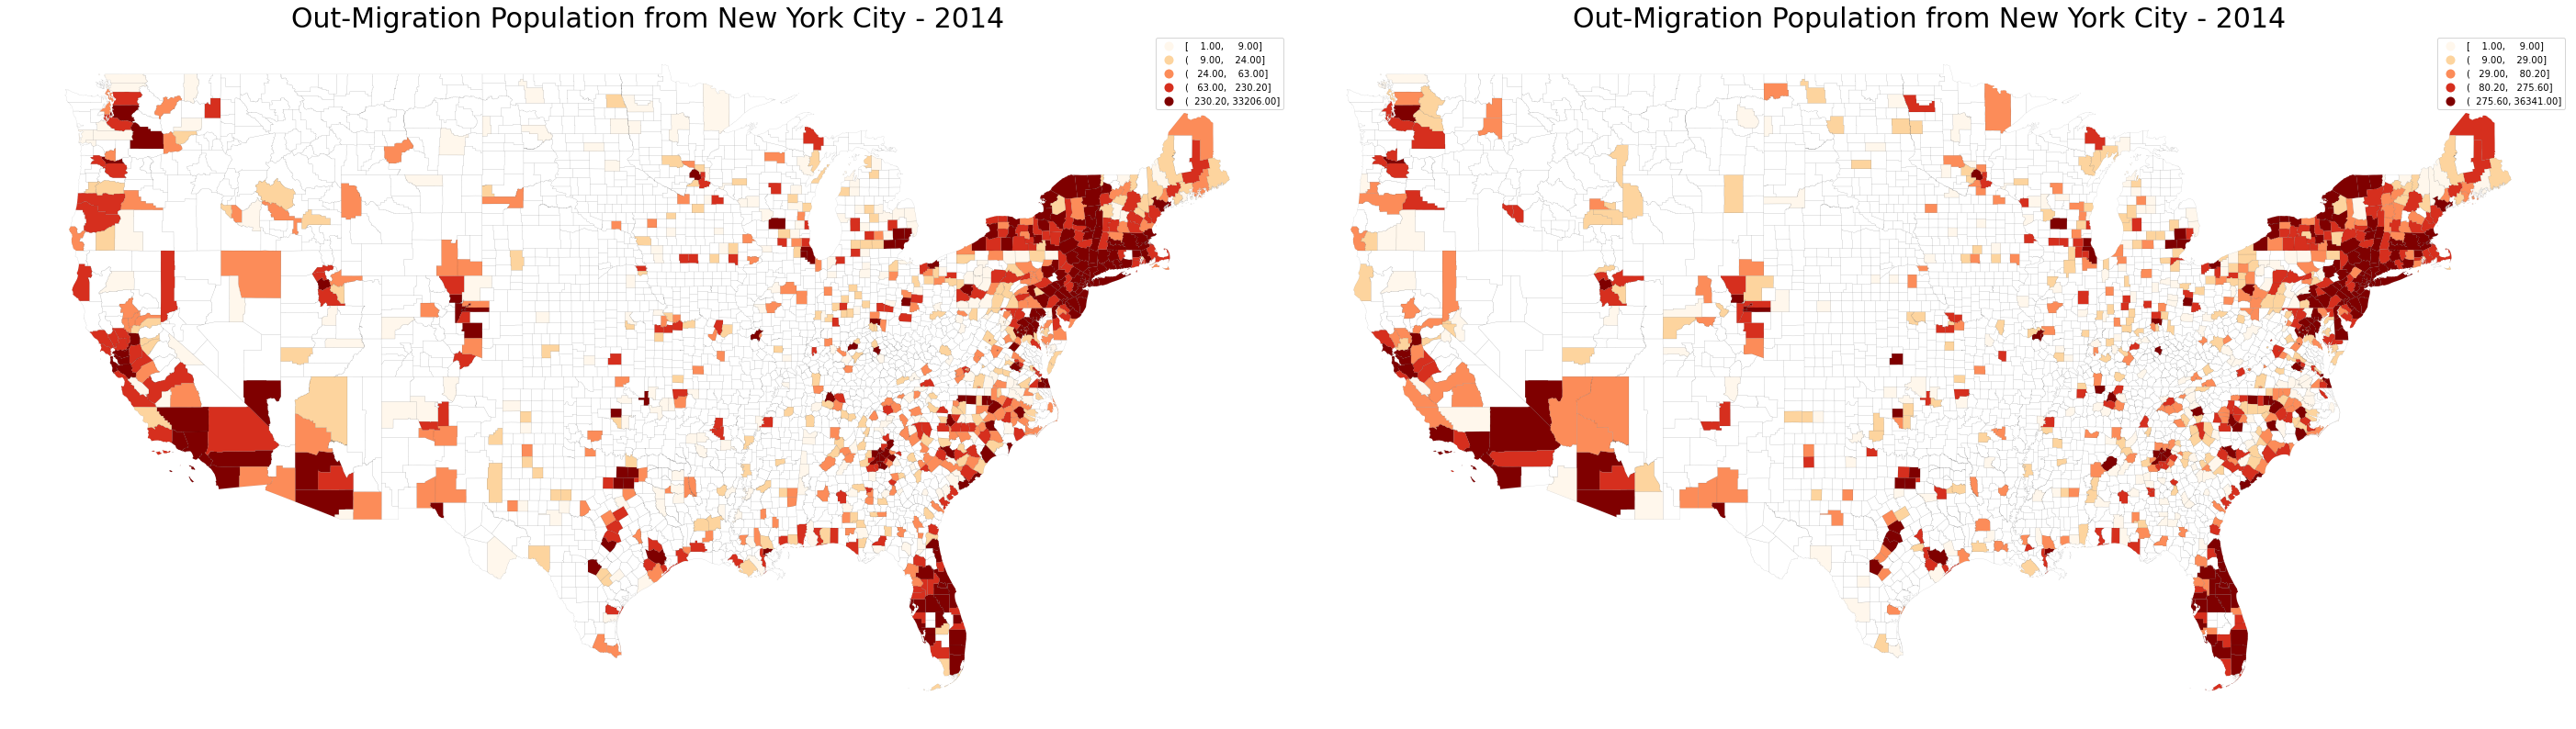

In [42]:
# Create a subplot with two map 2014 vs 2018
# Use the two dataset in the previous section

fig, axs = plt.subplots(1,2, figsize=(50, 30))

ax1, ax2 = axs


out_migration_nationalscale2014[out_migration_nationalscale2014.Region!= 'Non_the_contiguous_US'].plot(ax=ax1,scheme='Quantiles',cmap='OrRd',column = '2014', legend=True )


county_geodata_ready[county_geodata_ready.Region != 'Non_the_contiguous_US'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.25,
                                                                        alpha=0.2)
ax1.axis("off")
ax1.set_title("Out-Migration Population from New York City - 2014",fontsize = 30)

out_migration_nationalscale2018[out_migration_nationalscale2018.Region!= 'Non_the_contiguous_US'].plot(ax=ax2,scheme='Quantiles',cmap='OrRd',column = '2018', legend=True )


county_geodata_ready[county_geodata_ready.Region != 'Non_the_contiguous_US'].plot(ax=ax2,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.25,
                                                                        alpha=0.2)
plt.subplots_adjust(wspace = 0)

ax2.axis("off")
ax2.set_title("Out-Migration Population from New York City - 2014",fontsize = 30)



<h3>
<code style="background:yellow;color:red">FINDING7: Map of Out-Migration Population from New York City (Regional)- 2014 vs 2018:
</code>
</h3>

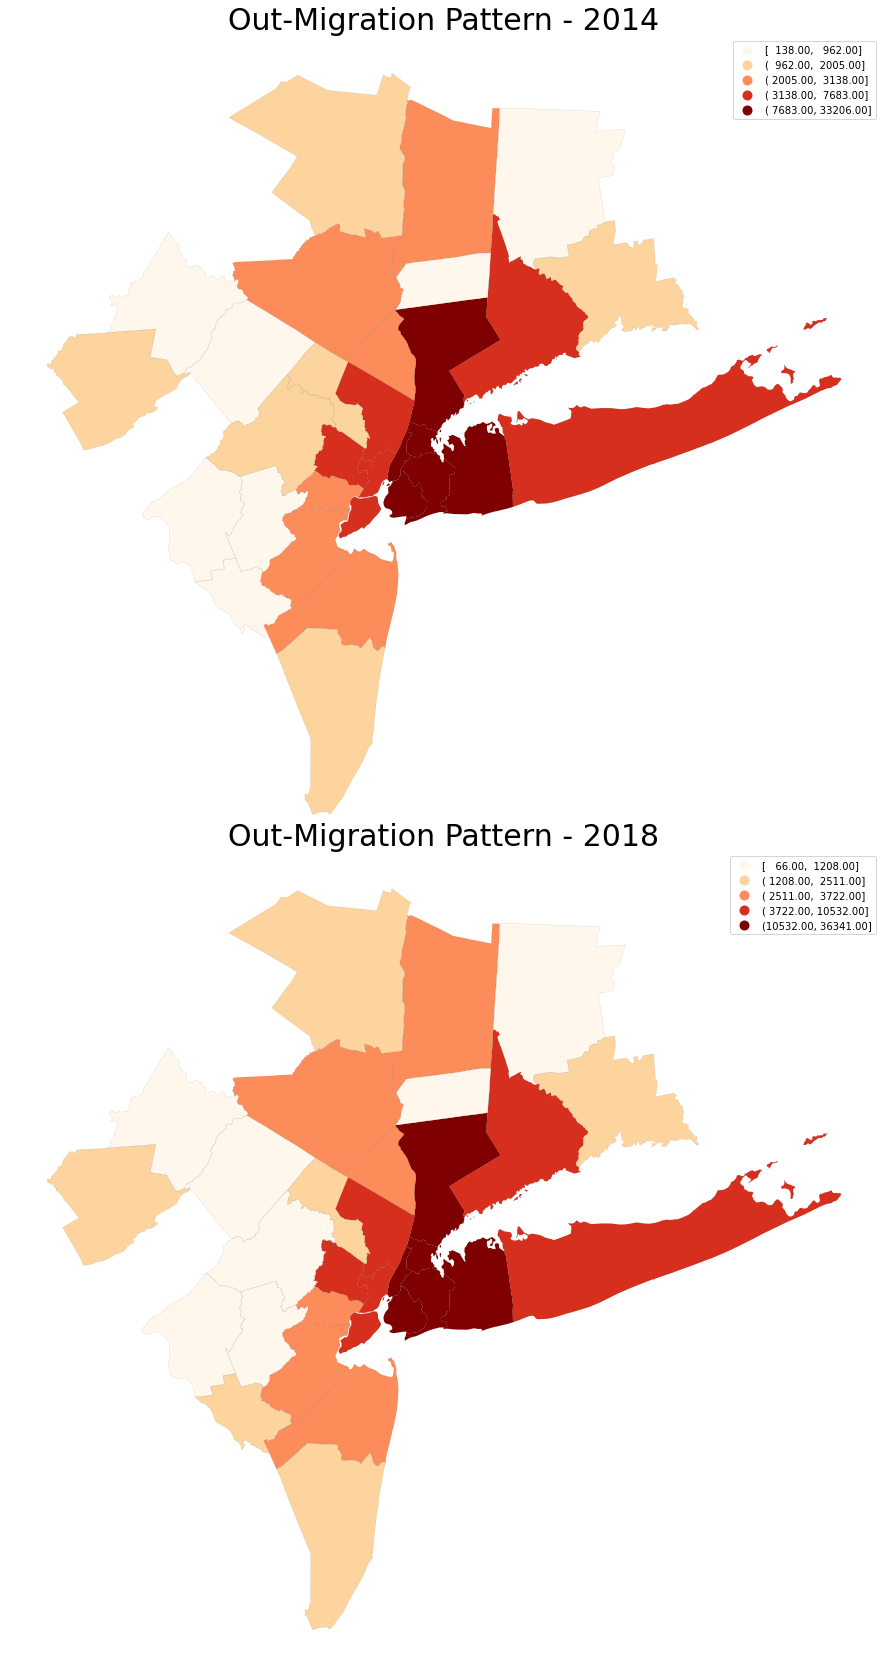

In [43]:
# Create a subplot with two map 2014 vs 2018
# Use the two dataset in the previous section

fig, axs = plt.subplots(2,1, figsize=(50, 30))

ax1, ax2 = axs


out_migration_regionalscale2014[out_migration_regionalscale2014.Region== 'NYC_Metro'].plot(ax=ax1,scheme='Quantiles',cmap='OrRd',column = '2014', legend=True )


county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.25,
                                                                        alpha=0.2)
ax1.axis("off")
ax1.set_title("Out-Migration Pattern - 2014",fontsize = 30)

out_migration_regionalscale2018[out_migration_regionalscale2018.Region== 'NYC_Metro'].plot(ax=ax2,scheme='Quantiles',cmap='OrRd',column = '2018', legend=True )


county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax2,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.25,
                                                                        alpha=0.2)

ax2.axis("off")
ax2.set_title("Out-Migration Pattern - 2018",fontsize = 30)
plt.subplots_adjust(hspace = 0)


<h2>
<code style="background:yellow;color:red">FINDING8: Top 10 Migration Destination in New York Metro Area for New York City - 2014 vs 2018
</code>
</h2>

In [44]:
# Create a subplot with two map 2014 vs 2018
# Use the two dataset in the previous section

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

fig.add_trace(go.Bar(y=out_migration_regionalscale2014_top10['County_Name'], 
                     x=out_migration_regionalscale2014_top10['2014'],orientation = 'h',
                    text= out_migration_regionalscale2014_top10['2014'],
                     textposition="outside",
                    name="2014"),
              row=1, col=1)

fig.add_trace(go.Bar(y=out_migration_regionalscale2018_top10['County_Name'], 
                     x=out_migration_regionalscale2018_top10['2018'],
                     orientation = 'h',
                    text= out_migration_regionalscale2018_top10['2018'],
                     textposition="outside",
                    name="2018"),
              row=2, col=1,)

fig.update_layout(height=600, width=1000,
                  title_text="Top 10 Migration Destination in New York Metro Area for New York City")

fig.update_layout(legend_title_text = "Year")

fig.show()

In [45]:
# Now, I want to compare my 2014 and 2018 data together
# So, I merge the two dataset earlier.

out_migration_regionalscale2014vs2018 = out_migration_regionalscale2014.merge(out_migration_regionalscale2018,on='GEOID')

out_migration_regionalscale2014vs2018.head()

GEOID                                         geometry_x  \
0  36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
1  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
2  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
3  36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
4  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   

        County_Name_x   Region_x   2014  \
0     Kings, New York  NYC_Metro 33,206   
1  New York, New York  NYC_Metro 31,890   
2     Bronx, New York  NYC_Metro 30,346   
3    Queens, New York  NYC_Metro 29,565   
4    Nassau, New York  NYC_Metro 16,513   

                                          geometry_y       County_Name_y  \
0  POLYGON ((-74.04201 40.62605, -74.04199 40.626...     Kings, New York   
1  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...  New York, New York   
2  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...     Bronx, New York   
3  POLYGON ((-73.96262 40.73903, -73.96138 40.742...    Queens, New York   
4  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...    Nassau, New York   

    Region_y   2018  
0  NYC_Metro 36,341  
1  NYC_Metro 25,180  
2  NYC_Metro 24,135  
3  NYC_Metro 29,775  
4  NYC_Metro 21,286

In [46]:
# Only keep the important columns that I will be using. 
# Also create a new column to calculate for differences between 2018 and 2014

columns_to_keep6 = ['GEOID','2014','2018']

out_migration_regionalscale2014vs2018_trimmed2 = out_migration_regionalscale2014vs2018[columns_to_keep6]

out_migration_regionalscale2014vs2018_trimmed2 ['Difference'] = out_migration_regionalscale2014vs2018_trimmed2['2018'] - out_migration_regionalscale2014vs2018_trimmed2['2014']

out_migration_regionalscale2014vs2018_trimmed2

<ipython-input-46-abccd70074e1>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



GEOID   2014   2018  Difference
0   36047 33,206 36,341       3,135
1   36061 31,890 25,180      -6,710
2   36005 30,346 24,135      -6,211
3   36081 29,565 29,775         210
4   36059 16,513 21,286       4,773
5   36119 14,643 17,355       2,712
6   34017  7,683 10,532       2,849
7   36103  7,331  9,179       1,848
8   09001  5,734  6,535         801
9   36085  5,465  6,735       1,270
10  34003  5,046  6,405       1,359
11  34013  4,010  6,421       2,411
12  34025  3,138  3,546         408
13  36071  2,635  3,582         947
14  34023  2,621  2,876         255
15  34039  2,521  3,722       1,201
16  36027  2,373  3,520       1,147
17  36087  2,040  2,761         721
18  09009  2,005  2,511         506
19  34029  1,720  1,349        -371
20  36111  1,557  1,818         261
21  42089  1,406  1,486          80
22  34031  1,311  1,366          55
23  34027  1,107  1,208         101
24  36079    962    656        -306
25  34021    614  1,559         945
26  34037    291     66        -225
27  34035    245    551         306
28  09005    235    208         -27
29  34019    159    107         -52
30  42103    138    356         218

In [47]:
# Then, I will match this dataset with the geo dataset
# Also sort by the differences

out_migration_regionalscale2014vs2018_trimmed3 = county_geodata_ready.merge(out_migration_regionalscale2014vs2018_trimmed2, 
                                                             on='GEOID',
                                                            how = 'right')

out_migration_regionalscale2014vs2018_trimmed3 = out_migration_regionalscale2014vs2018_trimmed3.sort_values(by='Difference', ascending=False)

out_migration_regionalscale2014vs2018_trimmed3

GEOID                                           geometry  \
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   

                County_Name     Region   2014   2018  Difference  
16         Nassau, New York  NYC_Metro 16,513 21,286       4,773  
4           Kings, New York  NYC_Metro 33,206 36,341       3,135  
28       Hudson, New Jersey  NYC_Metro  7,683 10,532       2,849  
12    Westchester, New York  NYC_Metro 14,643 17,355       2,712  
2         Essex, New Jersey  NYC_Metro  4,010  6,421       2,411  
11        Suffolk, New York  NYC_Metro  7,331  9,179       1,848  
1        Bergen, New Jersey  NYC_Metro  5,046  6,405       1,359  
24       Richmond, New York  NYC_Metro  5,465  6,735       1,270  
26        Union, New Jersey  NYC_Metro  2,521  3,722       1,201  
25       Dutchess, New York  NYC_Metro  2,373  3,520       1,147  
20         Orange, New York  NYC_Metro  2,635  3,582         947  
7        Mercer, New Jersey  NYC_Metro    614  1,559         945  
14   Fairfield, Connecticut  NYC_Metro  5,734  6,535         801  
30       Rockland, New York  NYC_Metro  2,040  2,761         721  
0    New Haven, Connecticut  NYC_Metro  2,005  2,511         506  
8      Monmouth, New Jersey  NYC_Metro  3,138  3,546         408  
10     Somerset, New Jersey  NYC_Metro    245    551         306  
29         Ulster, New York  NYC_Metro  1,557  1,818         261  
3     Middlesex, New Jersey  NYC_Metro  2,621  2,876         255  
13       Pike, Pennsylvania  NYC_Metro    138    356         218  
5          Queens, New York  NYC_Metro 29,565 29,775         210  
17       Morris, New Jersey  NYC_Metro  1,107  1,208         101  
15     Monroe, Pennsylvania  NYC_Metro  1,406  1,486          80  
18      Passaic, New Jersey  NYC_Metro  1,311  1,366          55  
21  Litchfield, Connecticut  NYC_Metro    235    208         -27  
6     Hunterdon, New Jersey  NYC_Metro    159    107         -52  
23       Sussex, New Jersey  NYC_Metro    291     66        -225  
22         Putnam, New York  NYC_Metro    962    656        -306  
9         Oc

In [48]:
# I want to know the top 5 and bottom 5 
# Create a new dataset for those 10 values

out_migration_regionalscale2014vs2018_trimmed3_top5andbottom5 = out_migration_regionalscale2014vs2018_trimmed3.iloc[np.r_[0:5, -5:0]]

out_migration_regionalscale2014vs2018_trimmed3_top5andbottom5

GEOID                                           geometry  \
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   

              County_Name     Region   2014   2018  Difference  
16       Nassau, New York  NYC_Metro 16,513 21,286       4,773  
4         Kings, New York  NYC_Metro 33,206 36,341       3,135  
28     Hudson, New Jersey  NYC_Metro  7,683 10,532       2,849  
12  Westchester, New York  NYC_Metro 14,643 17,355       2,712  
2       Essex, New Jersey  NYC_Metro  4,010  6,421       2,411  
23     Sussex, New Jersey  NYC_Metro    291     66        -225  
22       Putnam, New York  NYC_Metro    962    656        -306  
9       Ocean, New Jersey  NYC_Metro  1,720  1,349        -371  
27        Bronx, New York  NYC_Metro 30,346 24,135      -6,211  
19     New York, New York  NYC_Metro 31,890 25,180      -6,710

<h2>
<code style="background:yellow;color:red">FINDING9: Top 5 and Bottom 5 of Out-Migration Population Change in New York Metro Area
</code>
</h2>

In [49]:
# Make a bar chart

fig = px.bar(out_migration_regionalscale2014vs2018_trimmed3_top5andbottom5, 
             x=out_migration_regionalscale2014vs2018_trimmed3_top5andbottom5['Difference'],
             y=out_migration_regionalscale2014vs2018_trimmed3_top5andbottom5['County_Name'],
             color=out_migration_regionalscale2014vs2018_trimmed3_top5andbottom5['Difference'], 
             orientation="h",
             color_continuous_scale='Bluered_r',
              title ='Top 5 and Bottom 5 of Out-Migration Population Change in New York Metro Area'

             )

fig.show()

In [50]:
# I want to calculate the data based on the population base.
# I import a population cense data here

migration2014_rawdata = pd.read_csv('data/10_Migration_county_population.csv')

migration2014_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GEO_ID  31 non-null     object
 1   NAME    31 non-null     object
 2   2014    31 non-null     int64 
 3   2018    31 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [51]:
# I don't need the name, since I have them already.

migration2014_rawdata = migration2014_rawdata.drop(['NAME'],axis=1)

migration2014_rawdata.head()

GEO_ID    2014    2018
0  0500000US09001  934215  944348
1  0500000US09005  187542  183031
2  0500000US09009  863148  859339
3  0500000US34003  920456  929999
4  0500000US34013  789616  793555

In [52]:
# Because this GEOID is not "standard" that is matched with our existing GEOID
# I will "trim" this GEOID

migration2014_rawdata['GEO_ID'] = migration2014_rawdata['GEO_ID'].str[-5:]

migration2014_rawdata.columns =['GEOID','2014_Population','2018_Population']

migration2014_rawdata.head()

GEOID  2014_Population  2018_Population
0  09001           934215           944348
1  09005           187542           183031
2  09009           863148           859339
3  34003           920456           929999
4  34013           789616           793555

In [53]:
# Merge this data with the geo dataset

out_migration_regionalscale2014vs2018_trimmed4 = out_migration_regionalscale2014vs2018_trimmed3.merge(migration2014_rawdata,
                                                                                                     on='GEOID',
                                                                                                     how='left')

out_migration_regionalscale2014vs2018_trimmed4

GEOID                                           geometry  \
0   36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
1   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
2   34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
3   36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
4   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
5   36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
6   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
7   36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
8   34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
9   36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
10  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
11  34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
12  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
13  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
14  09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
15  34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
16  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
17  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
18  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
19  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
20  36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
21  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
22  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
23  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
24  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
25  34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
26  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
27  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
28  34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
29  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
30  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   

                County_Name     Region   2014   2018  Difference  \
0          Nassau, New York  NYC_Metro 16,513 21,286       4,773   
1           Kings, New York  NYC_Metro 33,206 36,341       3,135   
2        Hudson, New Jersey  NYC_Metro  7,683 10,532       2,849   
3     Westchester, New York  NYC_Metro 14,643 17,355       2,712   
4         Essex, New Jersey  NYC_Metro  4,010  6,421       2,411   
5         Suffolk, New York  NYC_Metro  7,331  9,179       1,848   
6        Bergen, New Jersey  NYC_Metro  5,046  6,405       1,359   
7        Richmond, New York  NYC_Metro  5,465  6,735       1,270   
8         Union, New Jersey  NYC_Metro  2,521  3,722       1,201   
9        Dutchess, New York  NYC_Metro  2,373  3,520       1,147   
10         Orange, New York  NYC_Metro  2,635  3,582         947   
11       Mercer, New Jersey  NYC_Metro    614  1,559         945   
12   Fairfield, Connecticut  NYC_Metro  5,734  6,535         801   
13       Rockland, New York  NYC_Metro  2,040  2,761         721   
14   New Haven, Connecticut  NYC_Metro  2,005  2,511         506   
15     Monmouth, New Jersey  NYC_Metro  3,138  3,546         408   
16     Somerset, New Jersey  NYC_Metro    245    551         306   
17         Ulster, New York  NYC_Metro  1,557  1,818         261   
18    Middlesex, New Jersey  NYC_Metro  2,621  2,876         255   
19       Pike, Pennsylvania  NYC_Metro    138    356         218   
20         Queens, New York  NYC_Metro 29,565 29,775         210   
21       Morris, New Jersey  NYC_Metro  1,107  1,208         101   
22     Monroe, Pennsylvania  NYC_Metro  1,406  1,486          80   
23      Passaic, New Jersey  NYC_Metro  1,311  1,366          55   
24  Litchfield, Connecticut  NYC_Metro    235    208         -27   
25    Hunterdon, New Jersey  NYC_Metro    159    107         -52   
26       Sussex, New Jersey  NYC_Metro    291     66        -225   
27         Putnam, New York  NYC_Metro    962    65

In [54]:
# Create a new column to calculate the difference based on the population

out_migration_regionalscale2014vs2018_trimmed4 ['Migration_One_Ten_Thousandth'] = out_migration_regionalscale2014vs2018_trimmed4['Difference']/out_migration_regionalscale2014vs2018_trimmed4['2018_Population']*10000

out_migration_regionalscale2014vs2018_trimmed4.head()

GEOID                                           geometry  \
0  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
1  36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
2  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
3  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
4  34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   

             County_Name     Region   2014   2018  Difference  \
0       Nassau, New York  NYC_Metro 16,513 21,286       4,773   
1        Kings, New York  NYC_Metro 33,206 36,341       3,135   
2     Hudson, New Jersey  NYC_Metro  7,683 10,532       2,849   
3  Westchester, New York  NYC_Metro 14,643 17,355       2,712   
4      Essex, New Jersey  NYC_Metro  4,010  6,421       2,411   

   2014_Population  2018_Population  Migration_One_Ten_Thousandth  
0          1350601          1356564                            35  
1          2570801          2600747                            12  
2           654878           668631                            43  
3           962319           968815                            28  
4           789616           793555                            30

In [55]:
# Sort the dataset by the percent

out_migration_regionalscale2014vs2018_sortingbypercentage = out_migration_regionalscale2014vs2018_trimmed4.sort_values(by='Migration_One_Ten_Thousandth', ascending=False)

out_migration_regionalscale2014vs2018_sortingbypercentage

GEOID                                           geometry  \
2   34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
19  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
9   36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
0   36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
4   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3   36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
7   36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
11  34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
10  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
13  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
8   34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
6   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
17  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
5   36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
1   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
16  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
12  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
15  34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
14  09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
22  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
18  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
21  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
23  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
20  36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
24  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
25  34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
28  34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
26  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
27  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
30  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
29  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   

                County_Name     Region   2014   2018  Difference  \
2        Hudson, New Jersey  NYC_Metro  7,683 10,532       2,849   
19       Pike, Pennsylvania  NYC_Metro    138    356         218   
9        Dutchess, New York  NYC_Metro  2,373  3,520       1,147   
0          Nassau, New York  NYC_Metro 16,513 21,286       4,773   
4         Essex, New Jersey  NYC_Metro  4,010  6,421       2,411   
3     Westchester, New York  NYC_Metro 14,643 17,355       2,712   
7        Richmond, New York  NYC_Metro  5,465  6,735       1,270   
11       Mercer, New Jersey  NYC_Metro    614  1,559         945   
10         Orange, New York  NYC_Metro  2,635  3,582         947   
13       Rockland, New York  NYC_Metro  2,040  2,761         721   
8         Union, New Jersey  NYC_Metro  2,521  3,722       1,201   
6        Bergen, New Jersey  NYC_Metro  5,046  6,405       1,359   
17         Ulster, New York  NYC_Metro  1,557  1,818         261   
5         Suffolk, New York  NYC_Metro  7,331  9,179       1,848   
1           Kings, New York  NYC_Metro 33,206 36,341       3,135   
16     Somerset, New Jersey  NYC_Metro    245    551         306   
12   Fairfield, Connecticut  NYC_Metro  5,734  6,535         801   
15     Monmouth, New Jersey  NYC_Metro  3,138  3,546         408   
14   New Haven, Connecticut  NYC_Metro  2,005  2,511         506   
22     Monroe, Pennsylvania  NYC_Metro  1,406  1,486          80   
18    Middlesex, New Jersey  NYC_Metro  2,621  2,876         255   
21       Morris, New Jersey  NYC_Metro  1,107  1,208         101   
23      Passaic, New Jersey  NYC_Metro  1,311  1,366          55   
20         Queens, New York  NYC_Metro 29,565 29,775         210   
24  Litchfield, Connecticut  NYC_Metro    235    208         -27   
25    Hunterdon, New Jersey  NYC_Metro    159    107         -52   
28        Ocean, New Jersey  NYC_Metro  1,720  1,349        -371   
26       Sussex, New Jersey  NYC_Metro    291     6

In [56]:
# Also create a new dataset for the top 5 and the bottom 5

top5bottom5percentage_regionalscale = out_migration_regionalscale2014vs2018_sortingbypercentage.iloc[np.r_[0:5, -5:0]]
top5bottom5percentage_regionalscale

GEOID                                           geometry  \
2   34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
19  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
9   36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
0   36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
4   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
28  34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
26  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
27  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
30  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
29  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   

           County_Name     Region   2014   2018  Difference  2014_Population  \
2   Hudson, New Jersey  NYC_Metro  7,683 10,532       2,849           654878   
19  Pike, Pennsylvania  NYC_Metro    138    356         218            56883   
9   Dutchess, New York  NYC_Metro  2,373  3,520       1,147           297388   
0     Nassau, New York  NYC_Metro 16,513 21,286       4,773          1350601   
4    Essex, New Jersey  NYC_Metro  4,010  6,421       2,411           789616   
28   Ocean, New Jersey  NYC_Metro  1,720  1,349        -371           581413   
26  Sussex, New Jersey  NYC_Metro    291     66        -225           146888   
27    Putnam, New York  NYC_Metro    962    656        -306            99697   
30  New York, New York  NYC_Metro 31,890 25,180      -6,710          1618398   
29     Bronx, New York  NYC_Metro 30,346 24,135      -6,211          1413566   

    2018_Population  Migration_One_Ten_Thousandth  
2            668631                            43  
19            55498                            39  
9            293894                            39  
0           1356564                            35  
4            793555                            30  
28           591939                            -6  
26           142298                           -16  
27            99070                           -31  
30          1632480                           -41  
29          1437872                           -43

<h2>
<code style="background:yellow;color:red">FINDING10: Top 5 and Bottom 5 of Out-Migration Population Percentage Change in New York Metro Area
</code>
</h2>

In [57]:
# Create a bar chart

fig = px.bar(top5bottom5percentage_regionalscale, 
             x=top5bottom5percentage_regionalscale['Migration_One_Ten_Thousandth'],
             y=top5bottom5percentage_regionalscale['County_Name'],
             color=top5bottom5percentage_regionalscale['Migration_One_Ten_Thousandth'], 
             orientation="h",
             color_continuous_scale='Bluered_r',
             title ='Top 5 and Bottom 5 of Out-Migration Population Percentage Change in New York Metro Area'
             )
fig.show()

<h2>
<code style="background:yellow;color:red">FINDING11: Map of Out-Migration Population from New York City - 2014 vs 2018
</code>
</h2>

(-75.83930815, -71.66654285, 39.36461425, 42.310914749999995)

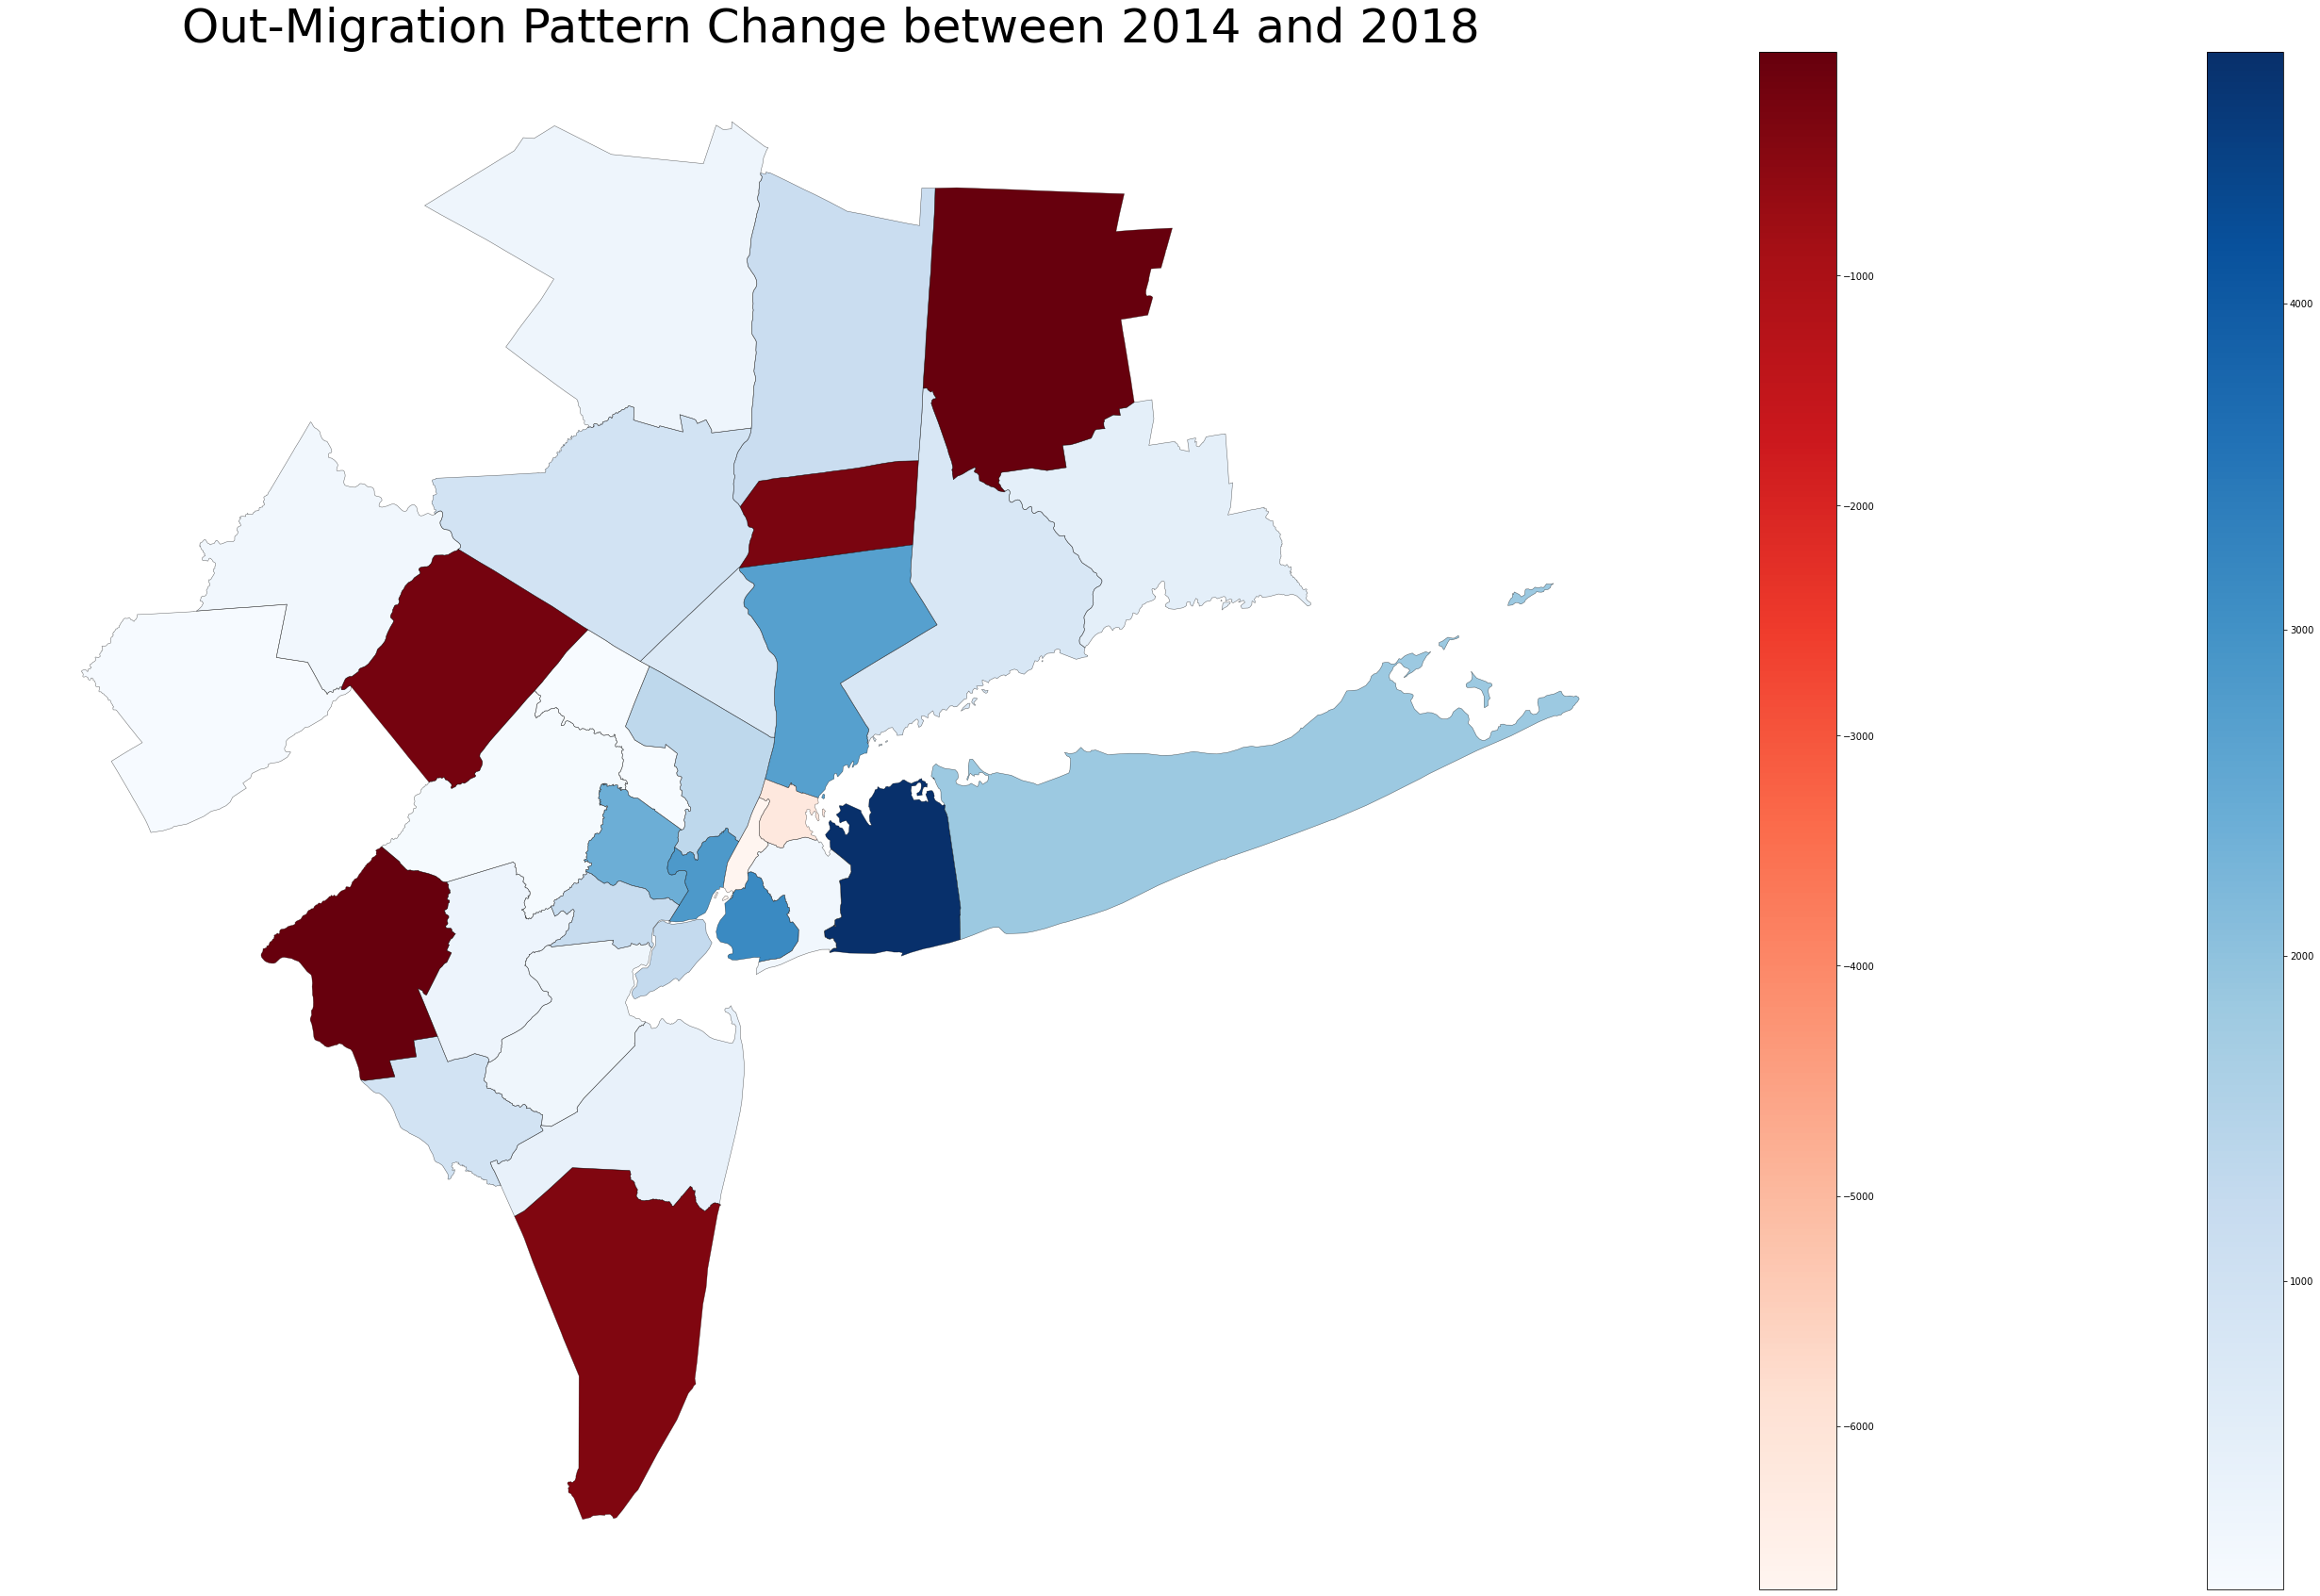

In [58]:
# Create a subplot with two map 2014 vs 2018
# Use the two dataset in the previous section

fig, axs = plt.subplots(1, 1, figsize=(50, 30))

ax1 = axs

out_migration_regionalscale2014vs2018_sortingbypercentage[out_migration_regionalscale2014vs2018_sortingbypercentage['Migration_One_Ten_Thousandth']>0].plot(ax=ax1,
                                                                                                                    cmap='Blues',
                                                                                                                    column = 'Difference', 
                                                                                                                    legend=True
                                                                                                                    )

county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                      facecolor='none',
                                                                      edgecolor='black',
                                                                      lw=0.25,
                                                                      alpha=0.2)
ax1.axis("off")
ax1.set_title("Out-Migration Pattern Change between 2014 and 2018",fontsize = 50)

out_migration_regionalscale2014vs2018_sortingbypercentage[out_migration_regionalscale2014vs2018_sortingbypercentage['Migration_One_Ten_Thousandth']<0].plot(ax=ax1,
                                                                                                                    cmap='Reds',
                                                                                                                    column = 'Difference', 
                                                                                                                    legend=True
                                                                                                                    )


county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.5,
                                                                        alpha=0.5)

ax2.axis("off")




<h2>
<code style="background:grey;color:black">Section 3. Analyze Economic Changes between 2014 and 2018
</code>
</h2>

In this section, I will be processing the economic changes between the two years. There are three economic metrics I will be using: GDP, Job Number, and Income. The data process is same to each of them. I will use CSV data and later paired with geo data.

<h3>
<code style="background:grey;color:black">Section 3.1 GDP Change for Each County betwen 2014 and 2018
</code>
</h3>

In [59]:
# First, import the cense data for GDP in 2014 and 2018

allcountyGDP_rawdata_2014and2018 = pd.read_csv('data/11_Economy_CountyGDP_2014and2018.csv',
                                              dtype={'GeoFips':str})

allcountyGDP_rawdata_2014and2018.head()

GeoFips      GeoName     2014     2018
0   01001  Autauga, AL  1503623  1739294
1   01003  Baldwin, AL  5512315  6875914
2   01005  Barbour, AL   788481   828063
3   01007     Bibb, AL   391866   424482
4   01009   Blount, AL   888896   980678

In [60]:
# Make sure all data are in the right data type

allcountyGDP_rawdata_2014and2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GeoFips  3113 non-null   object
 1   GeoName  3113 non-null   object
 2   2014     3113 non-null   int64 
 3   2018     3113 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 97.4+ KB


In [61]:
# Create a new column to calculate the difference between the two year and the percentage change

allcountyGDP_rawdata_2014and2018 = allcountyGDP_rawdata_2014and2018.drop(['GeoName'],axis=1)

allcountyGDP_rawdata_2014and2018.columns = ['GEOID','2014','2018']

allcountyGDP_rawdata_2014and2018['Difference'] = allcountyGDP_rawdata_2014and2018['2018']-allcountyGDP_rawdata_2014and2018['2014']

allcountyGDP_rawdata_2014and2018['Difference_Percentage'] = allcountyGDP_rawdata_2014and2018 ['Difference'] / allcountyGDP_rawdata_2014and2018['2014'] * 100

allcountyGDP_rawdata_2014and2018.head()

GEOID     2014     2018  Difference  Difference_Percentage
0  01001  1503623  1739294      235671                     16
1  01003  5512315  6875914     1363599                     25
2  01005   788481   828063       39582                      5
3  01007   391866   424482       32616                      8
4  01009   888896   980678       91782                     10

In [62]:
# Marge it with geo dataset 

NYCMetro_GDP_Rawdata = NYCMetro_5county_geodata_ready.merge(allcountyGDP_rawdata_2014and2018,
                                                           on='GEOID',
                                                           how='left')

NYCMetro_GDP_Rawdata.head()

GEOID                                           geometry  \
0  09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
1  34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2  34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
4  36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   

              County_Name     Region      2014       2018  Difference  \
0  New Haven, Connecticut  NYC_Metro  46955517   53258214     6302697   
1      Bergen, New Jersey  NYC_Metro  68259852   76957265     8697413   
2       Essex, New Jersey  NYC_Metro  50749112   57829253     7080141   
3   Middlesex, New Jersey  NYC_Metro  55939149   63393253     7454104   
4         Kings, New York  NYC_Metro  82801331  109288343    26487012   

   Difference_Percentage  
0                     13  
1                     13  
2                     14  
3                     13  
4                     32

In [63]:
# I want to see the order of the dataset so I sort all data by the percentage

NYCMetro_GDP_sorting = NYCMetro_GDP_Rawdata.sort_values(by='Difference_Percentage', ascending=False)

NYCMetro_GDP_sorting = NYCMetro_GDP_sorting.drop(['Region'],axis=1)

NYCMetro_GDP_sorting

GEOID                                           geometry  \
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   

                County_Name       2014       2018  Difference  \
4           Kings, New York   82801331  109288343    26487012   
5          Queens, New York   89191574  112038902    22847328   
24       Richmond, New York   13598070   17019449     3421379   
27          Bronx, New York   40720621   50495114     9774493   
19       New York, New York  604156655  740092291   135935636   
28       Hudson, New Jersey   42372356   51850524     9478168   
20         Orange, New York   15162078   18378918     3216840   
10     Somerset, New Jersey   33153836   40134274     6980438   
15     Monroe, Pennsylvania    5984737    7059835     1075098   
12    Westchester, New York   70838932   83040144    12201212   
13       Pike, Pennsylvania    1169292    1356361      187069   
7        Mercer, New Jersey   29427286   33882823     4455537   
29         Ulster, New York    6392016    7353496      961480   
11        Suffolk, New York   81758730   93814566    12055836   
16         Nassau, New York   83779296   95928266    12148970   
22         Putnam, New York    3171650    3626543      454893   
2         Essex, New Jersey   50749112   57829253     7080141   
0    New Haven, Connecticut   46955517   53258214     6302697   
3     Middlesex, New Jersey   55939149   63393253     7454104   
25       Dutchess, New York   12379523   14011783     1632260   
1        Bergen, New Jersey   68259852   76957265     8697413   
8      Monmouth, New Jersey   31414671   35302280     3887609   
9         Ocean, New Jersey   18897939   20741214     1843275   
14   Fairfield, Connecticut   82695041   90679271     7984230   
17       Morris, New Jersey   48962031   53493850     4531819   
26        Union, New Jersey   36528012   39576386     3048374   
23       Sussex, New Jersey    4559504    4878958      319454   
6     Hunterdon, New Jersey    7106519    7479741      373222   
21  Litchfield, Connecticut    8012662    8431142      418480   
18   

<h2>
<code style="background:yellow;color:red">FINDING12: GDP Ranking - 2014 vs 2018
</code>
</h2>

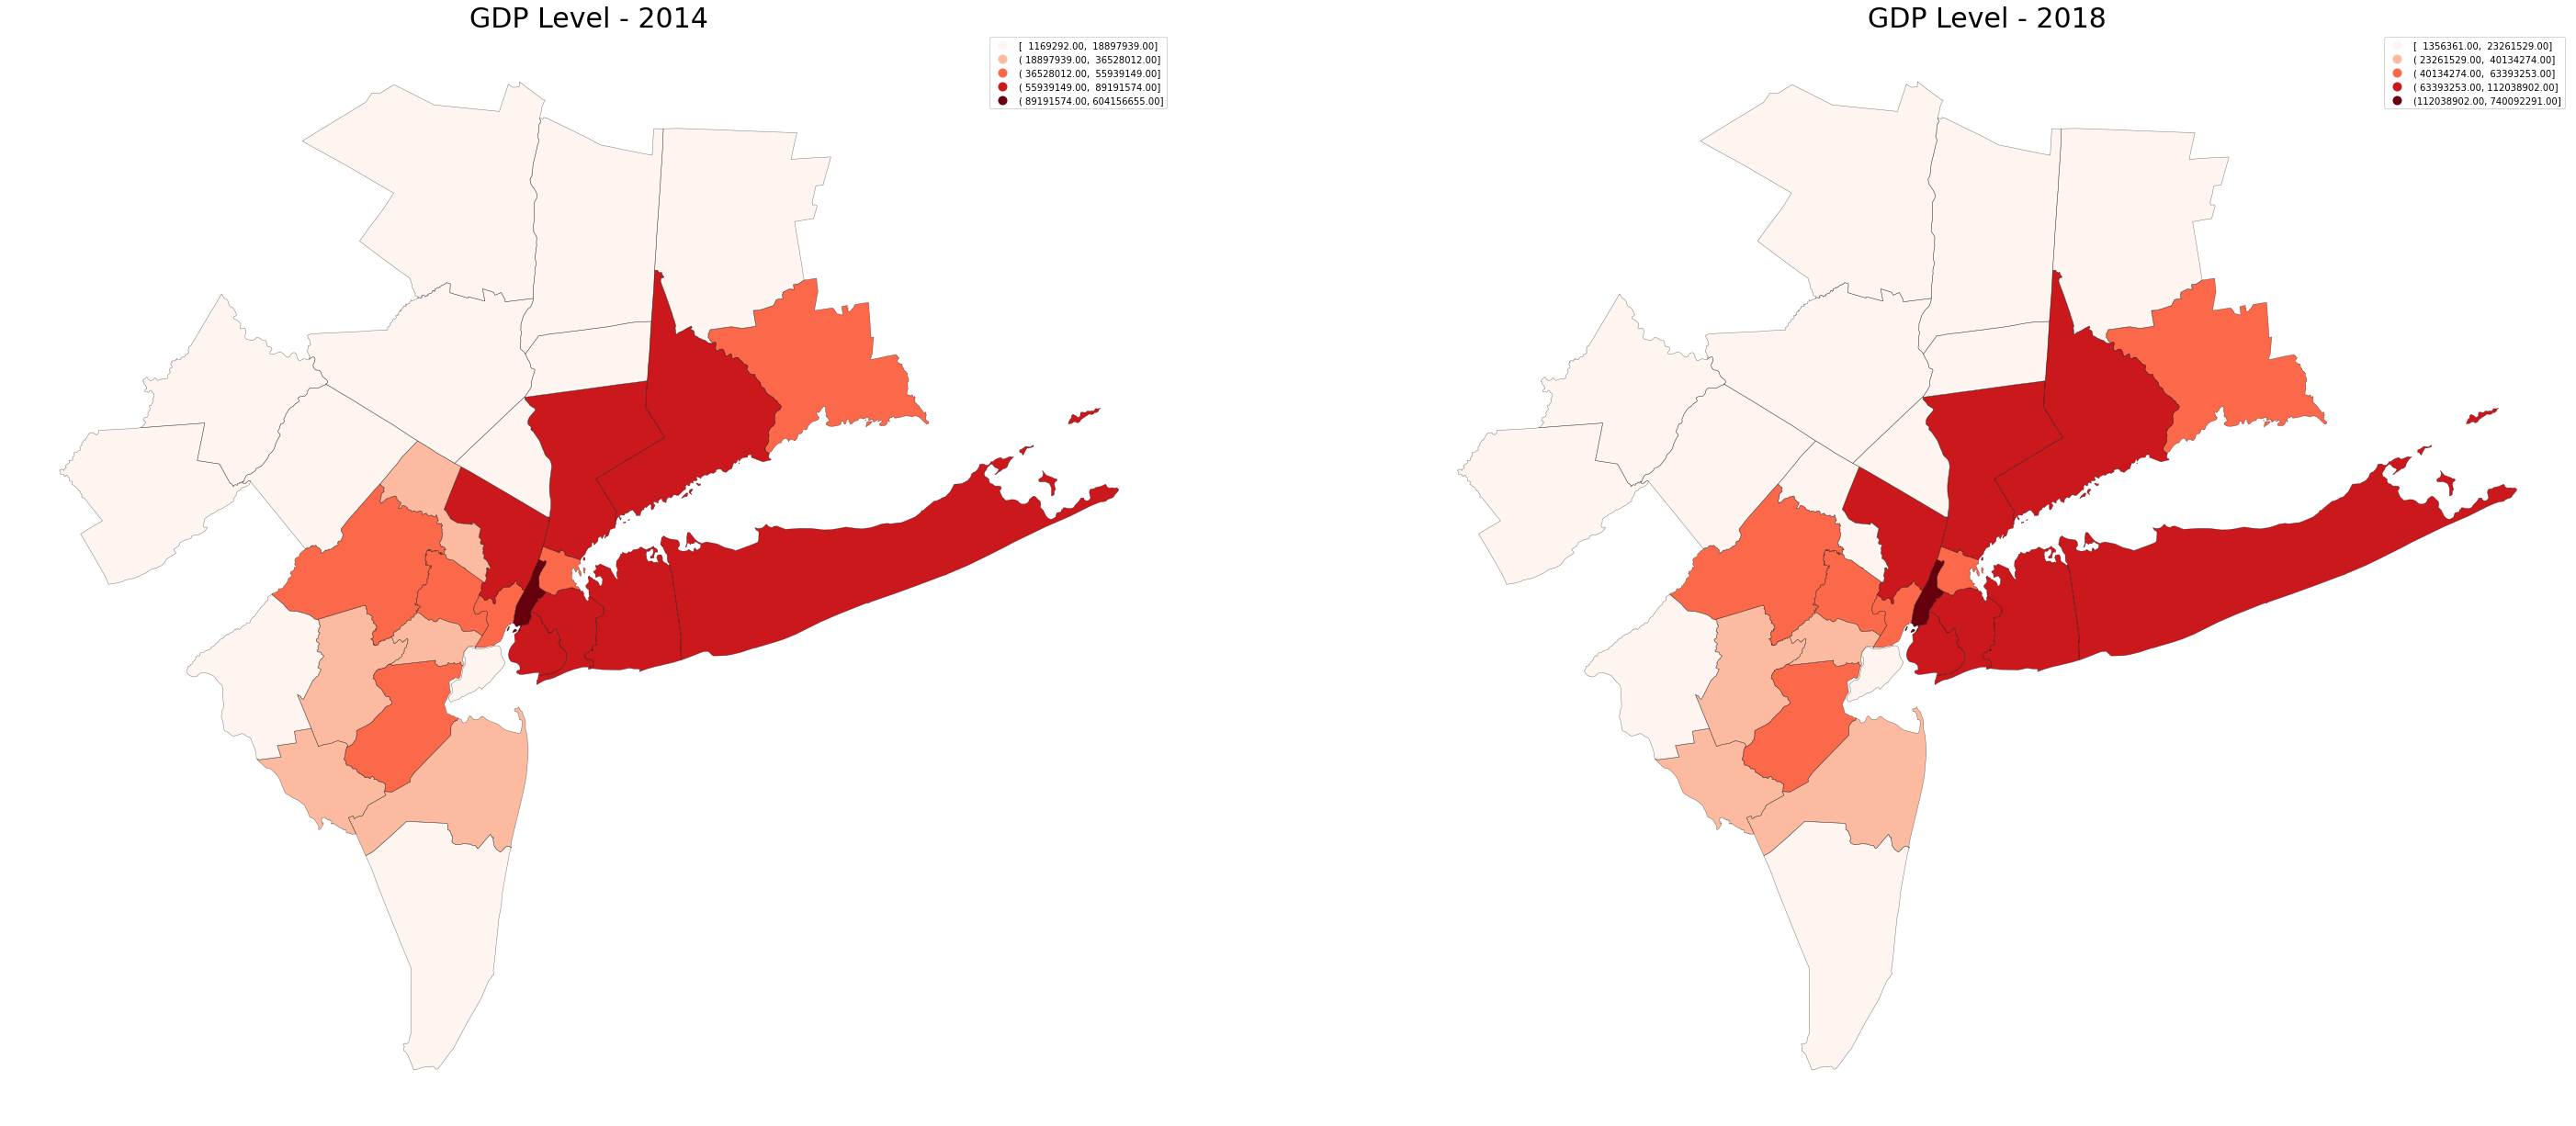

In [64]:
# Create a subplot that contains both 2014 and 2018 data. 


fig, axs = plt.subplots(1,2, figsize=(50, 30))
ax1, ax2 = axs
NYCMetro_GDP_sorting.plot(ax=ax1,
                          scheme='natural_breaks',
                          cmap='Reds',
                          column = '2014', 
                          legend=True
                          )

county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.5,
                                                                        alpha=0.5)
ax1.axis("off")
ax1.set_title("GDP Level - 2014",fontsize = 30)

NYCMetro_GDP_sorting.plot(ax=ax2,
                          scheme='natural_breaks',
                          cmap='Reds',
                          column = '2018', 
                          legend=True
                          )

county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax2,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.5,
                                                                        alpha=0.5)

ax2.axis("off")
ax2.set_title("GDP Level - 2018",fontsize = 30)
plt.subplots_adjust(hspace = 0)


In [65]:
# I also create a new dataframe that contains top 5 and bottom 5.

top5andbottom5_GDP = NYCMetro_GDP_sorting.iloc[np.r_[0:5, -5:0]]

top5andbottom5_GDP

GEOID                                           geometry  \
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   

                County_Name       2014       2018  Difference  \
4           Kings, New York   82801331  109288343    26487012   
5          Queens, New York   89191574  112038902    22847328   
24       Richmond, New York   13598070   17019449     3421379   
27          Bronx, New York   40720621   50495114     9774493   
19       New York, New York  604156655  740092291   135935636   
23       Sussex, New Jersey    4559504    4878958      319454   
6     Hunterdon, New Jersey    7106519    7479741      373222   
21  Litchfield, Connecticut    8012662    8431142      418480   
18      Passaic, New Jersey   22443730   23261529      817799   
30       Rockland, New York   17640497   17549815      -90682   

    Difference_Percentage  
4                      32  
5                      26  
24                     25  
27                     24  
19                     23  
23                      7  
6                       5  
21                      5  
18                      4  
30                     -1

<h2>
<code style="background:yellow;color:red">FINDING13: Top 5 and Bottm 5 of GDP Change - 2014 vs 2018
</code>
</h2>

In [66]:
# Make a graph to show the finding

fig = px.bar(top5andbottom5_GDP, 
             x=top5andbottom5_GDP['Difference_Percentage'],
             y=top5andbottom5_GDP['County_Name'],
             color=top5andbottom5_GDP['Difference_Percentage'], 
             orientation="h",
             color_continuous_scale='Bluered_r',
             title='Top 5 and Bottm 5 of GDP Change - 2014 vs 2018'
             )
fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

Text(0.5, 1.0, 'GDP Change Percentage - 2014 vs 2018')

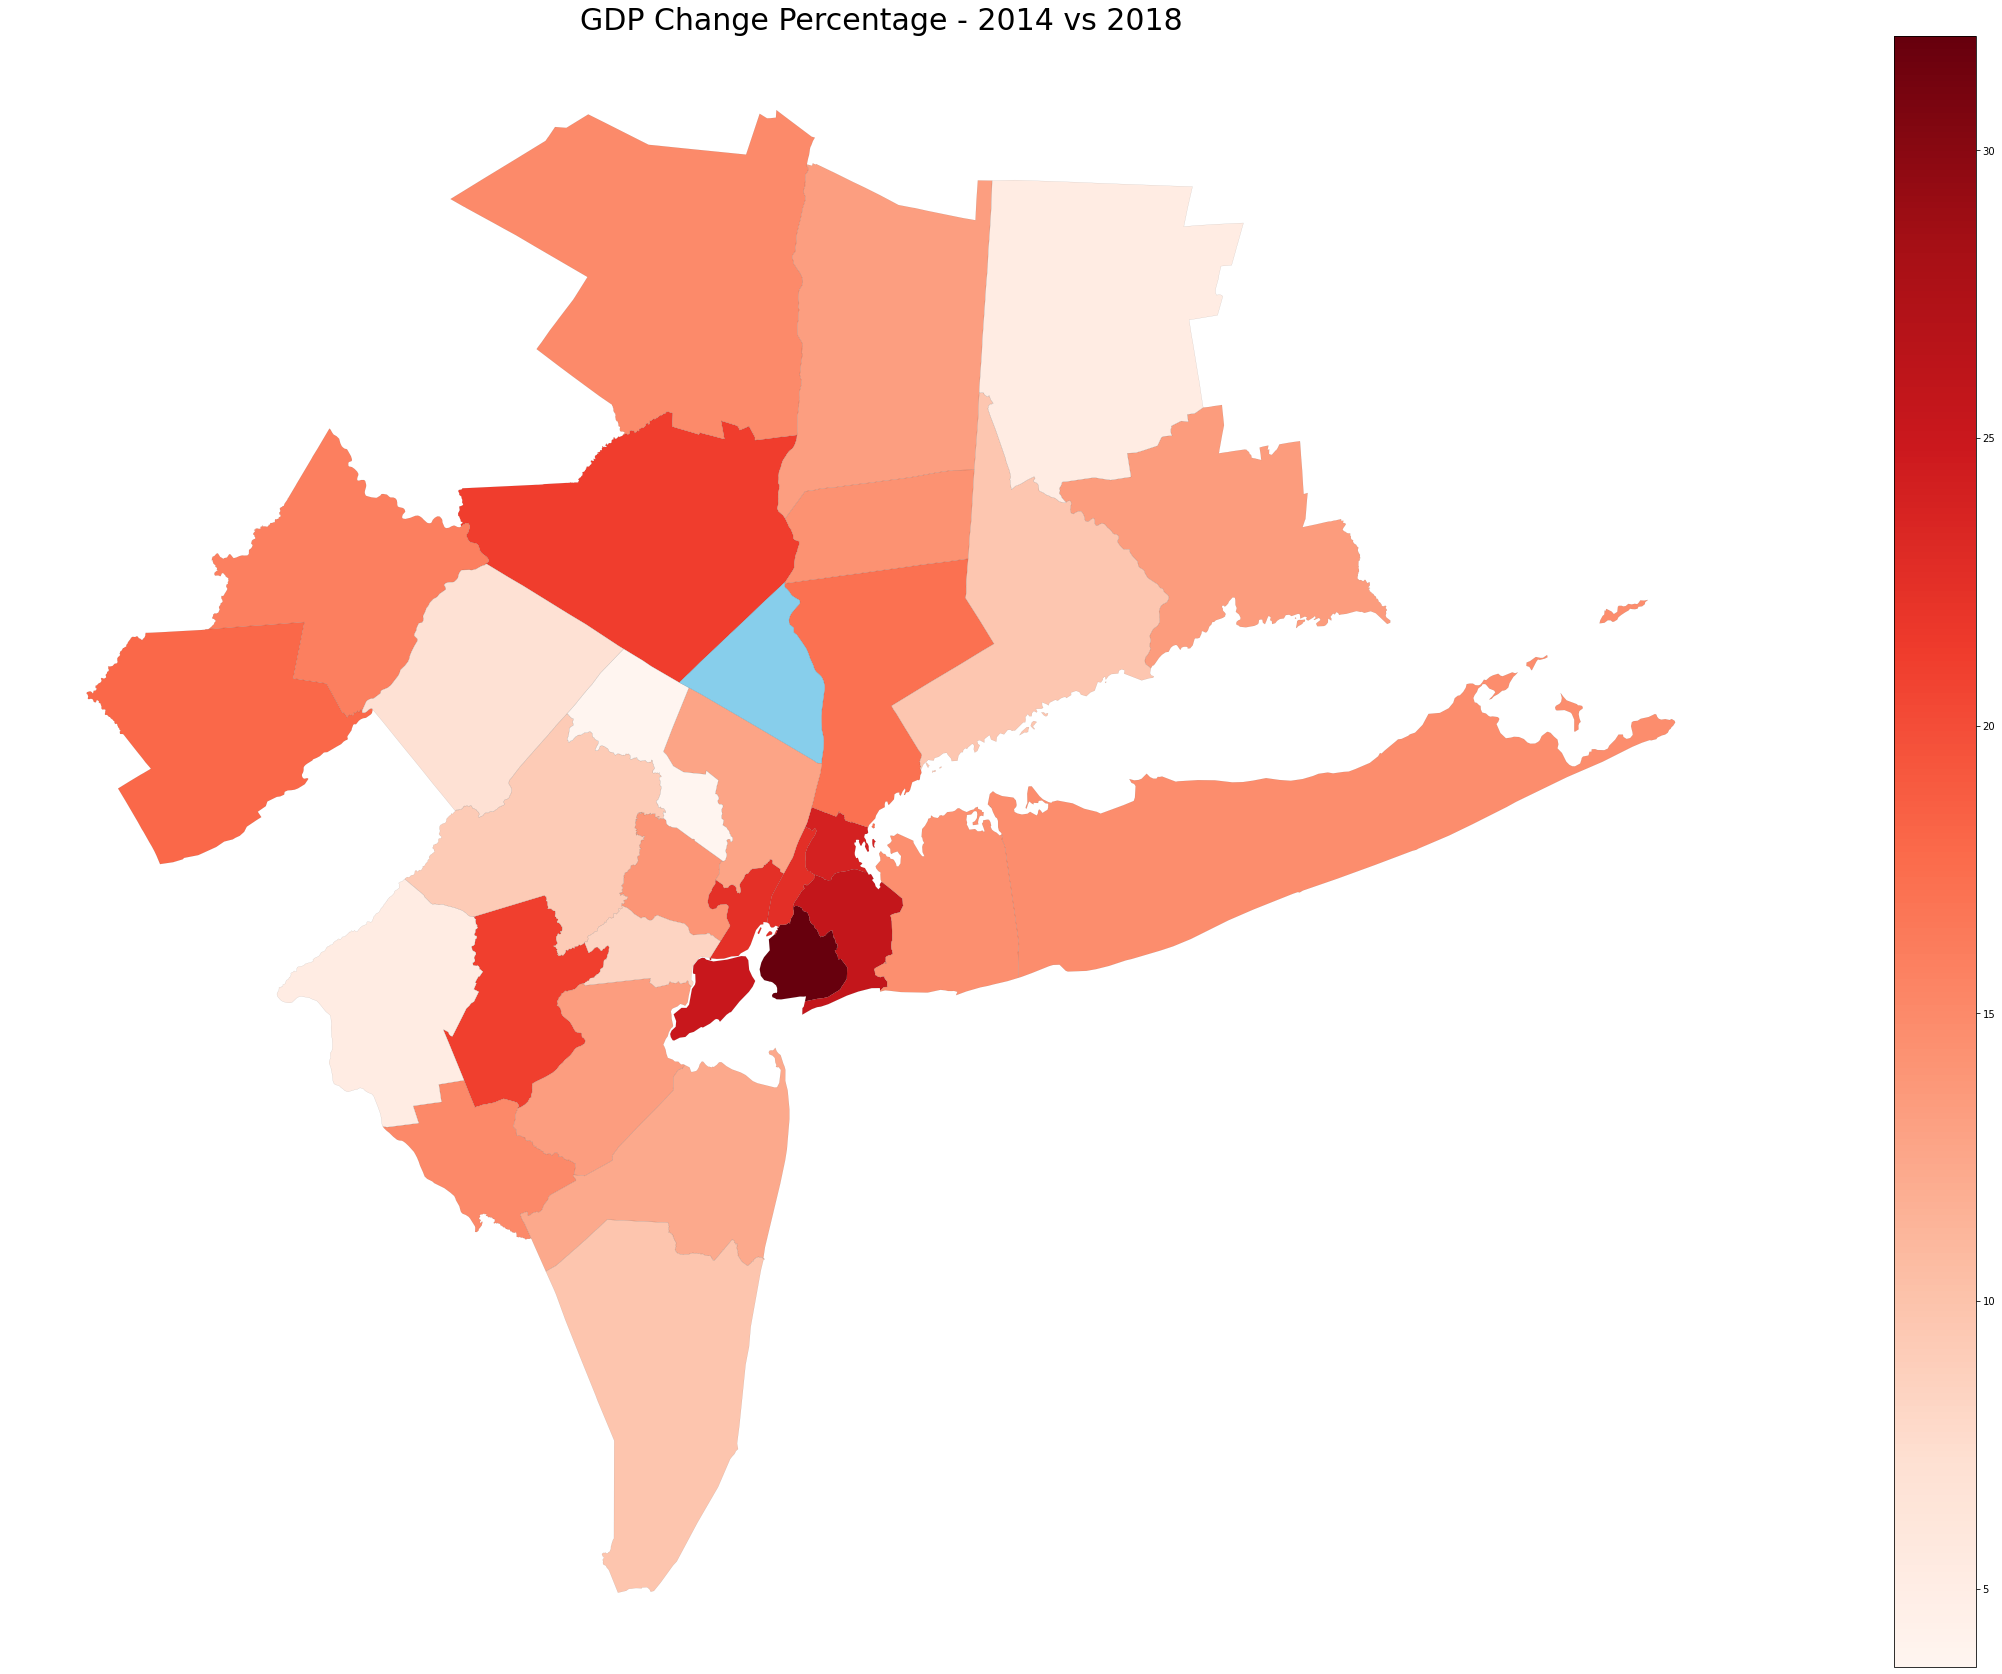

In [67]:
# Make a map to show this percentage.
# Blue for negative growth while the red for the postive growths.
# Create a subplot

fig, axs = plt.subplots(1, 1, figsize=(50, 30))
ax1 = axs

NYCMetro_GDP_sorting[NYCMetro_GDP_sorting['Difference_Percentage']>0].plot(ax=ax1,
                          cmap='Reds',
                          column = 'Difference_Percentage', 
                          legend=True
                          )

NYCMetro_GDP_sorting[NYCMetro_GDP_sorting['Difference_Percentage']<0].plot(ax=ax1,
                          facecolor='skyblue',
                          legend=True
                          )
county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.25,
                                                                        alpha=0.2)
ax1.axis("off")
ax1.set_title("GDP Change Percentage - 2014 vs 2018",fontsize = 30)



<h3>
<code style="background:grey;color:black">Section 3.2 Employment Number Change for Each County between 2014 and 2018
</code>
</h3>

In [68]:
# Import the CSV cense data on employment

employment_rawdata = pd.read_csv('data/12_Economy_EmploymentNumber_2014and2018.csv',
                                   dtype={'GEOID':str})

employment_rawdata.head()

GEOID      GeoName   2014    2018
0  01001  Autauga, AL  16858   18172
1  01003  Baldwin, AL  99807  115748
2  01005  Barbour, AL  11935   11506
3  01007     Bibb, AL   6486    6454
4  01009   Blount, AL  14246   15702

In [69]:
# Check the dataset to make sure all data are in the right data type and no null values

employment_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GEOID    3113 non-null   object
 1   GeoName  3113 non-null   object
 2   2014     3113 non-null   int64 
 3   2018     3113 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 97.4+ KB


In [70]:
# Merge this dataset with geo data

NYCMetro_employment_rawdata = NYCMetro_5county_geodata_ready.merge(employment_rawdata,
                                                                  on='GEOID',
                                                                  how='left')
NYCMetro_employment_rawdata

GEOID                                           geometry  \
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   

                County_Name     Region          GeoName     2014     2018  
0    New Haven, Connecticut  NYC_Metro    New Haven, CT   496755   511150  
1        Bergen, New Jersey  NYC_Metro       Bergen, NJ   639103   666371  
2         Essex, New Jersey  NYC_Metro        Essex, NJ   463337   489809  
3     Middlesex, New Jersey  NYC_Metro    Middlesex, NJ   511588   571701  
4           Kings, New York  NYC_Metro        Kings, NY  1003901  1191532  
5          Queens, New York  NYC_Metro       Queens, NY   929870  1058488  
6     Hunterdon, New Jersey  NYC_Metro    Hunterdon, NJ    75924    77193  
7        Mercer, New Jersey  NYC_Metro       Mercer, NJ   272638   290138  
8      Monmouth, New Jersey  NYC_Metro     Monmouth, NJ   374889   400536  
9         Ocean, New Jersey  NYC_Metro        Ocean, NJ   243243   269426  
10     Somerset, New Jersey  NYC_Metro     Somerset, NJ   244449   261980  
11        Suffolk, New York  NYC_Metro      Suffolk, NY   861620   899618  
12    Westchester, New York  NYC_Metro  Westchester, NY   605383   633249  
13       Pike, Pennsylvania  NYC_Metro         Pike, PA    18224    19158  
14   Fairfield, Connecticut  NYC_Metro    Fairfield, CT   646561   663549  
15     Monroe, Pennsylvania  NYC_Metro       Monroe, PA    73902    78544  
16         Nassau, New York  NYC_Metro       Nassau, NY   870361   921168  
17       Morris, New Jersey  NYC_Metro       Morris, NJ   386622   410112  
18      Passaic, New Jersey  NYC_Metro      Passaic, NJ   238438   245734  
19       New York, New York  NYC_Metro     New York, NY  2925470  3117139  
20         Orange, New York  NYC_Metro       Orange, NY   186300   198319  
21  Litchfield, Connecticut  NYC_Metro   Litchfield, CT    97167    96629  
22         Putnam, New York  NYC_Metro       Putnam, NY    40508    41787  
23       Sussex, New Jersey  NYC_Metro       Sussex, NJ    62109    62559  
24       Richmond, New York  NYC_Metro     Richmond, NY

In [71]:
# Create a new column to calculate the difference and the percentage change

NYCMetro_employment_rawdata = NYCMetro_employment_rawdata.drop(['Region','GeoName'],axis=1)

NYCMetro_employment_rawdata['Difference']=NYCMetro_employment_rawdata['2018'] - NYCMetro_employment_rawdata['2014']

NYCMetro_employment_rawdata['Difference_Percentage']=NYCMetro_employment_rawdata['Difference']/NYCMetro_employment_rawdata['2014'] *100

NYCMetro_employment_rawdata.head()

GEOID                                           geometry  \
0  09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
1  34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2  34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
4  36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   

              County_Name     2014     2018  Difference  Difference_Percentage  
0  New Haven, Connecticut   496755   511150       14395                      3  
1      Bergen, New Jersey   639103   666371       27268                      4  
2       Essex, New Jersey   463337   489809       26472                      6  
3   Middlesex, New Jersey   511588   571701       60113                     12  
4         Kings, New York  1003901  1191532      187631                     19

In [72]:
#  Sort the dataset by the percentage

NYCMetro_employment_rawdata_sorting = NYCMetro_employment_rawdata.sort_values(by='Difference_Percentage', ascending=False)

NYCMetro_employment_rawdata_sorting.head()

GEOID                                           geometry  \
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   

              County_Name     2014     2018  Difference  Difference_Percentage  
4         Kings, New York  1003901  1191532      187631                     19  
5        Queens, New York   929870  1058488      128618                     14  
28     Hudson, New Jersey   336189   380203       44014                     13  
3   Middlesex, New Jersey   511588   571701       60113                     12  
9       Ocean, New Jersey   243243   269426       26183                     11

<h2>
<code style="background:yellow;color:red">FINDING14: Job number change - 2014 vs 2018
</code>
</h2>

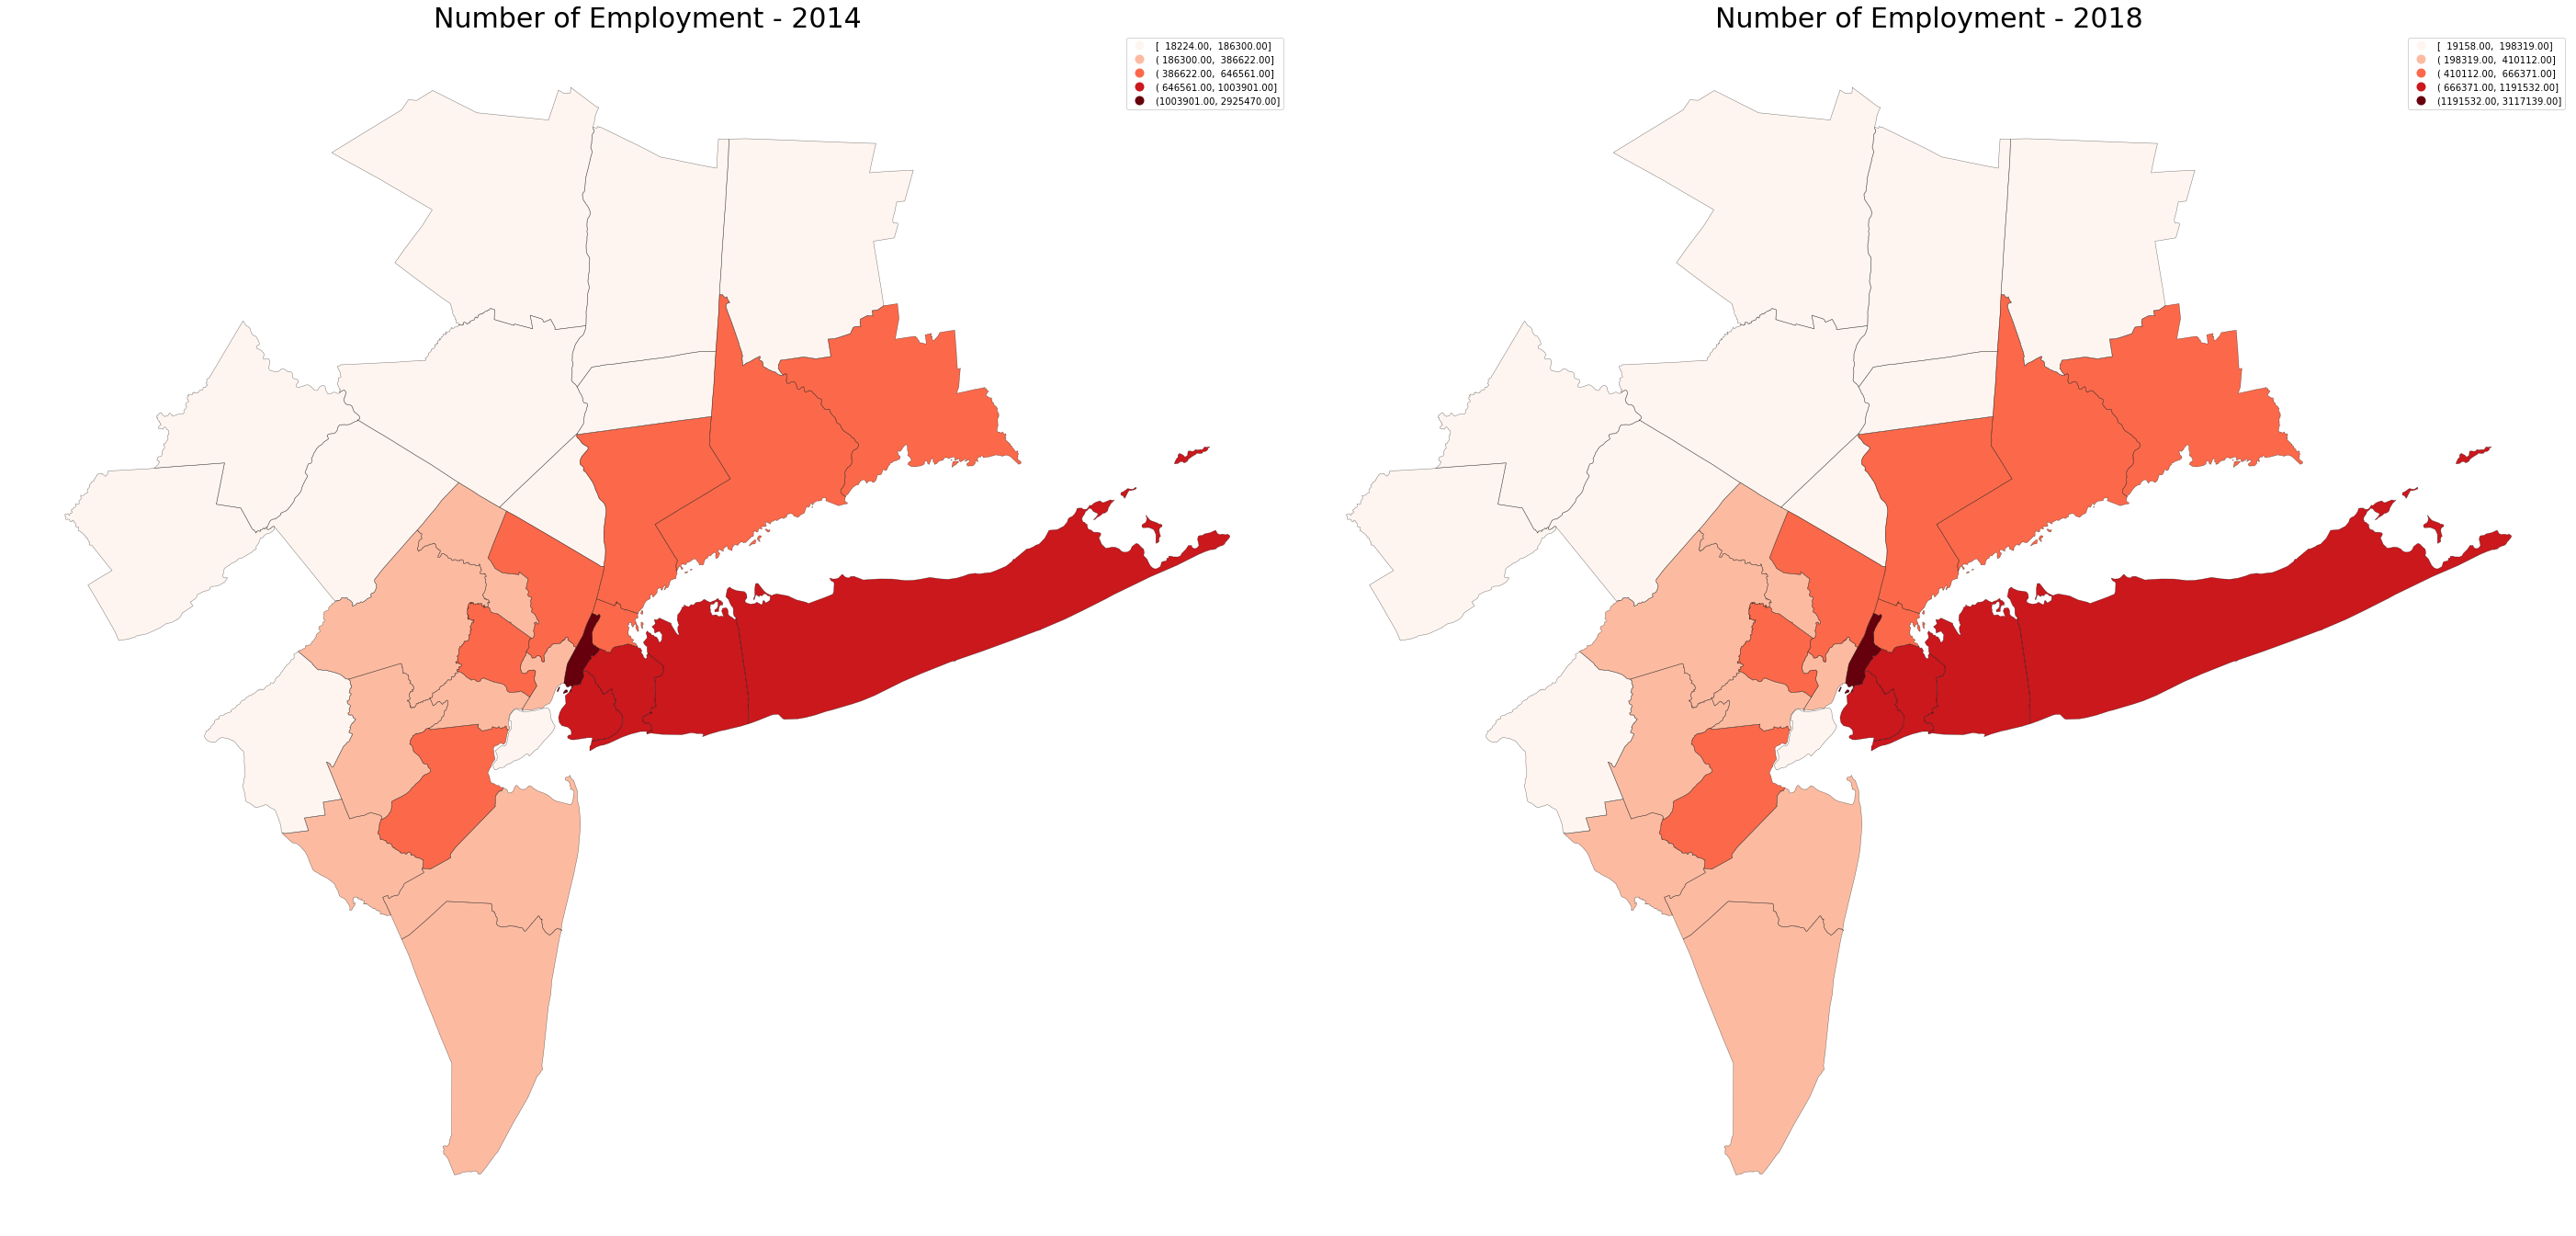

In [73]:
# Make a subplot to show the finding in 2014 and 2018

fig, axs = plt.subplots(1,2, figsize=(50, 30))
ax1, ax2 = axs
NYCMetro_employment_rawdata_sorting.plot(ax=ax1,
                          scheme='natural_breaks',
                          cmap='Reds',
                          column = '2014', 
                          legend=True
                          )

county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.5,
                                                                        alpha=0.5)
ax1.axis("off")
ax1.set_title("Number of Employment - 2014",fontsize = 30)

NYCMetro_employment_rawdata_sorting.plot(ax=ax2,
                          scheme='natural_breaks',
                          cmap='Reds',
                          column = '2018', 
                          legend=True
                          )

county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax2,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.5,
                                                                        alpha=0.5)

ax2.axis("off")
ax2.set_title("Number of Employment - 2018",fontsize = 30)
plt.subplots_adjust(wspace = 0)


In [74]:
# Create a new dataframe that shows the top 5 and bottom 5

NYCMetro_employment_top5andbottom5 = NYCMetro_employment_rawdata_sorting.iloc[np.r_[0:5, -5:0]]
NYCMetro_employment_top5andbottom5

GEOID                                           geometry  \
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   

                County_Name     2014     2018  Difference  \
4           Kings, New York  1003901  1191532      187631   
5          Queens, New York   929870  1058488      128618   
28       Hudson, New Jersey   336189   380203       44014   
3     Middlesex, New Jersey   511588   571701       60113   
9         Ocean, New Jersey   243243   269426       26183   
0    New Haven, Connecticut   496755   511150       14395   
14   Fairfield, Connecticut   646561   663549       16988   
6     Hunterdon, New Jersey    75924    77193        1269   
23       Sussex, New Jersey    62109    62559         450   
21  Litchfield, Connecticut    97167    96629        -538   

    Difference_Percentage  
4                      19  
5                      14  
28                     13  
3                      12  
9                      11  
0                       3  
14                      3  
6                       2  
23                      1  
21                     -1

<h2>
<code style="background:yellow;color:red">FINDING15: Top 5 and Bottm 5 of Employment Number Change - 2014 vs 2018
</code>
</h2>

In [75]:
# Make a bar table to show where they are and the numbers

fig = px.bar(NYCMetro_employment_top5andbottom5, 
             x=NYCMetro_employment_top5andbottom5['Difference_Percentage'],
             y=NYCMetro_employment_top5andbottom5['County_Name'],
             color=NYCMetro_employment_top5andbottom5['Difference_Percentage'], 
             orientation="h",
             color_continuous_scale='Bluered_r'
             )



fig.show()

Text(0.5, 1.0, 'The Number of Jobs Change Percentage - 2014 vs 2018')

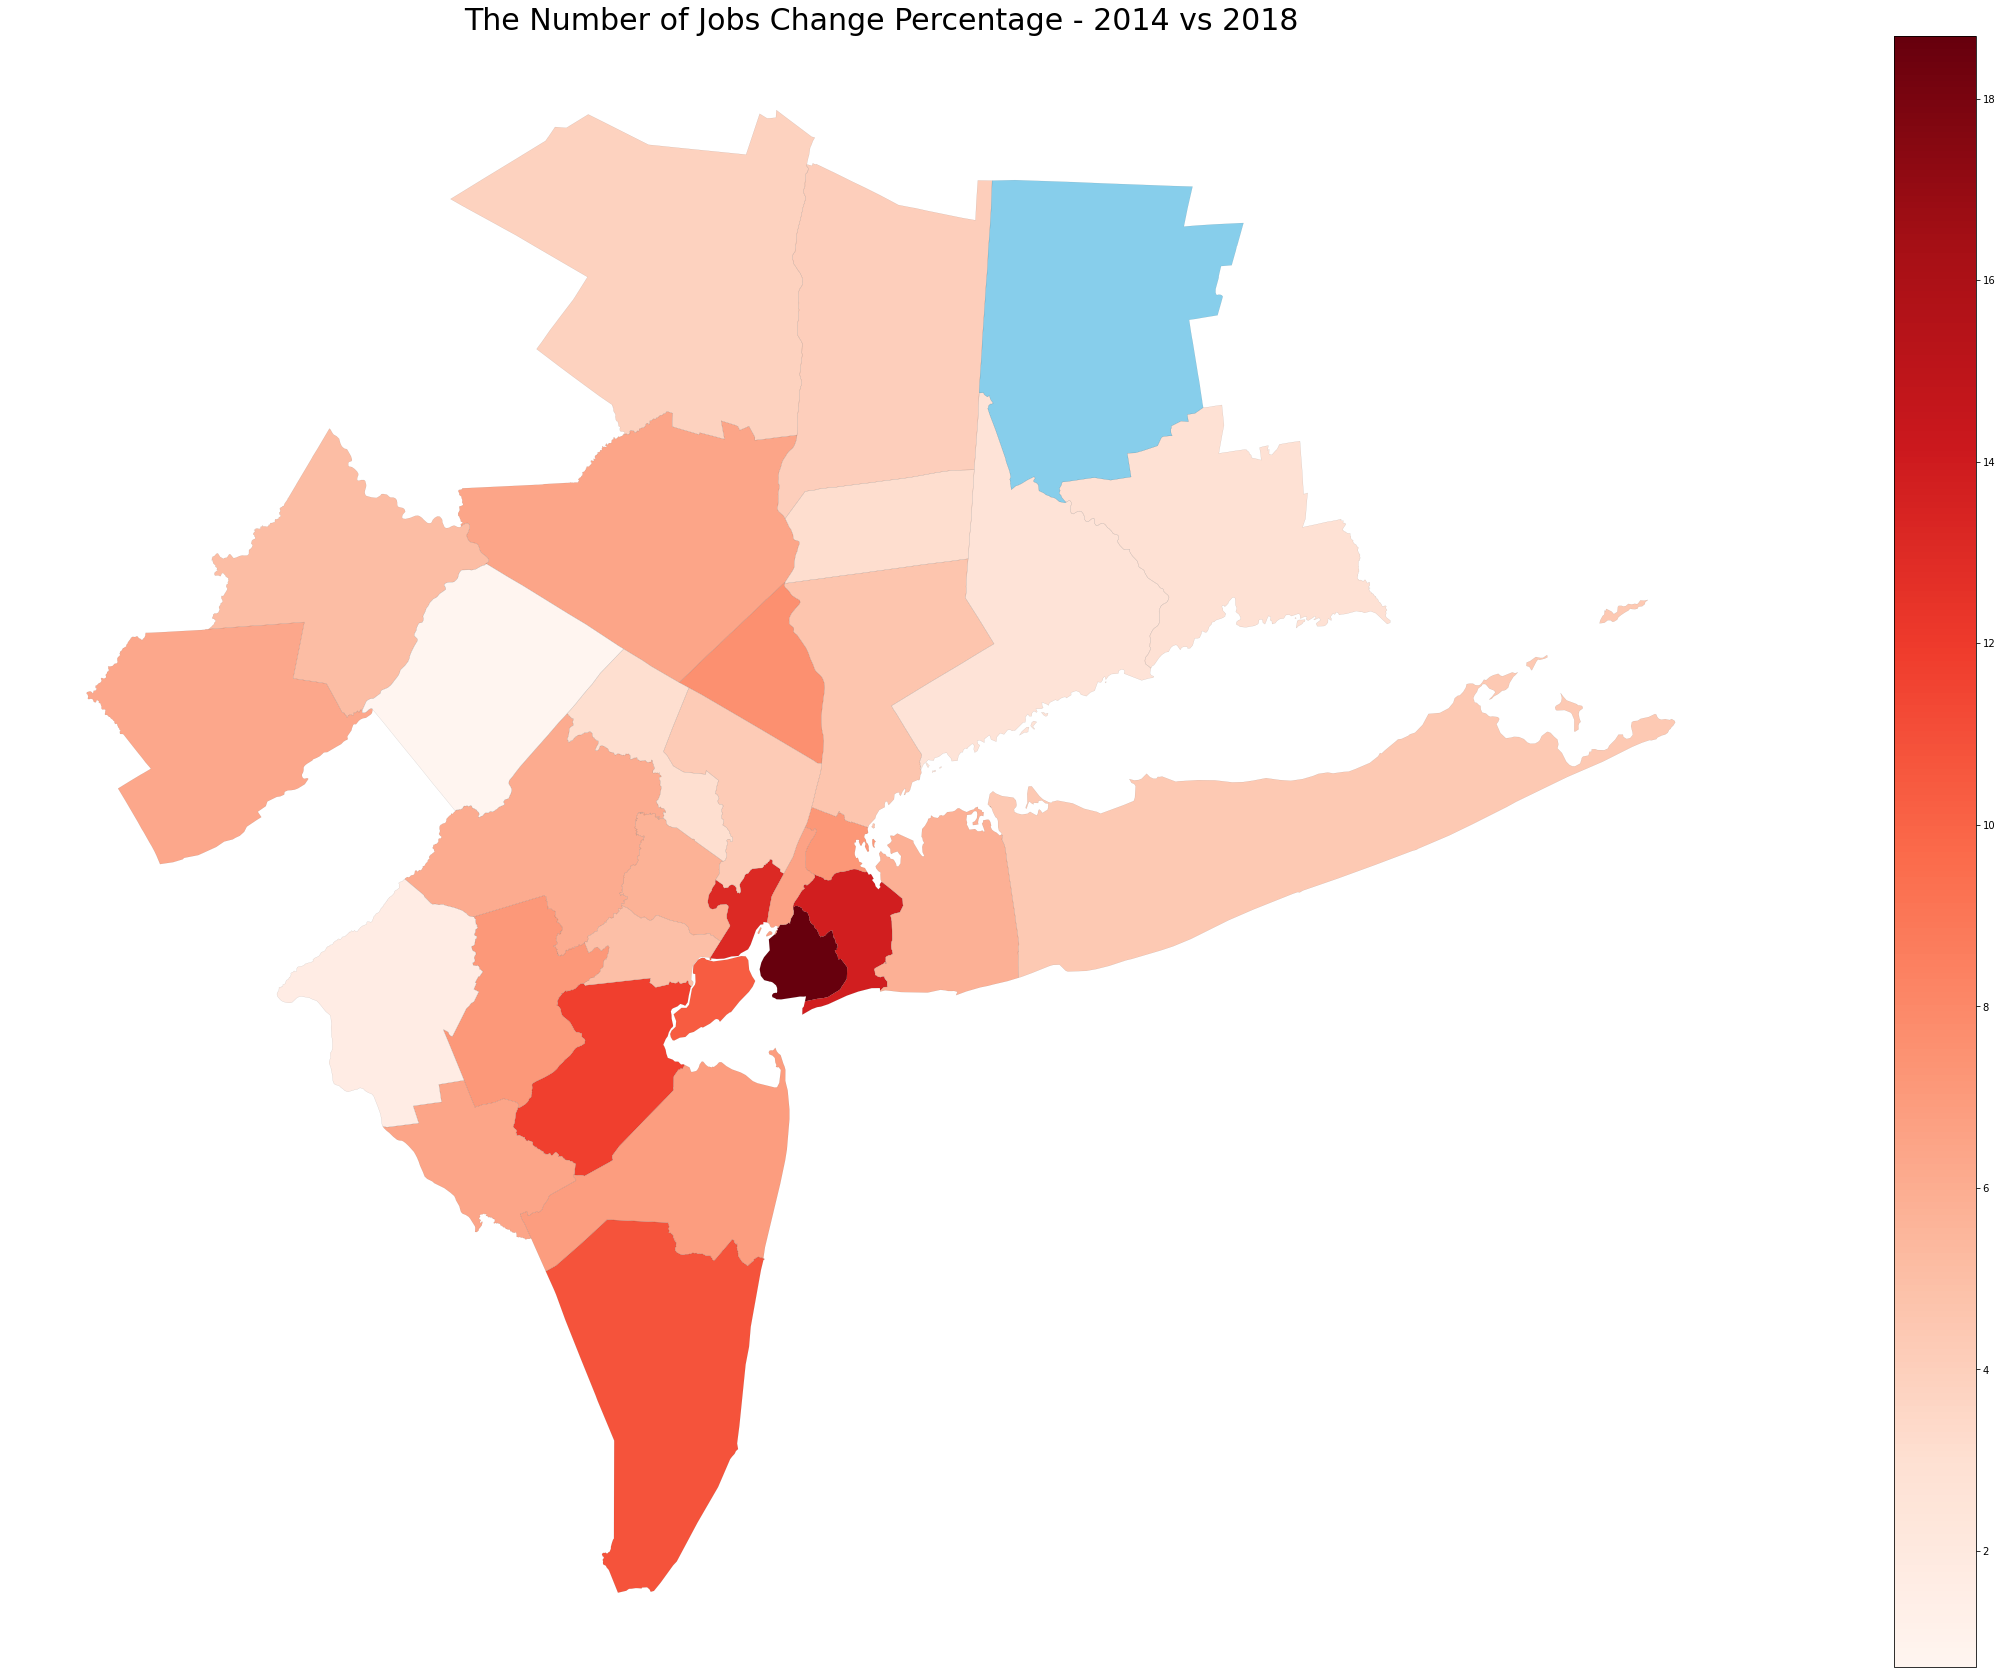

In [76]:
# Create a subplot to show the percentage - blue means the negative growth and red means the postive ones

fig, axs = plt.subplots(1, 1, figsize=(50, 30))
ax1 = axs

NYCMetro_employment_rawdata_sorting[NYCMetro_employment_rawdata_sorting['Difference_Percentage']>0].plot(ax=ax1,
                          cmap='Reds',
                          column = 'Difference_Percentage', 
                          legend=True
                          )

NYCMetro_employment_rawdata_sorting[NYCMetro_employment_rawdata_sorting['Difference_Percentage']<0].plot(ax=ax1,
                          facecolor='skyblue',
                          legend=True
                          )
county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.25,
                                                                        alpha=0.2)
ax1.axis("off")
ax1.set_title("The Number of Jobs Change Percentage - 2014 vs 2018",fontsize = 30)



<h3>
<code style="background:grey;color:black">Section 3.3 Income Change for Each County between 2014 and 2018
</code>
</h3>

In [77]:
# Import the data for income level

income_rawdata = pd.read_csv('data/13_Economy_IncomeLevel_2014and2018.csv',
                                   dtype={'GEOID':str})

income_rawdata.head()

GEOID      GeoName   2014   2018
0  01001  Autauga, AL  36786  42504
1  01003  Baldwin, AL  39602  46205
2  01005  Barbour, AL  29874  35067
3  01007     Bibb, AL  28224  30559
4  01009   Blount, AL  31547  35671

In [78]:
# Check the dataset to make sure the data are valid and are in the type

income_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GEOID    3113 non-null   object
 1   GeoName  3113 non-null   object
 2   2014     3113 non-null   int64 
 3   2018     3113 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 97.4+ KB


In [79]:
# Merge it with geo data

NYCMetro_income_rawdata = NYCMetro_5county_geodata_ready.merge(income_rawdata,
                                                                  on='GEOID',
                                                                  how='left')
NYCMetro_income_rawdata

GEOID                                           geometry  \
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   

                County_Name     Region          GeoName    2014    2018  
0    New Haven, Connecticut  NYC_Metro    New Haven, CT   50298   55779  
1        Bergen, New Jersey  NYC_Metro       Bergen, NJ   74480   86404  
2         Essex, New Jersey  NYC_Metro        Essex, NJ   58487   65214  
3     Middlesex, New Jersey  NYC_Metro    Middlesex, NJ   53964   61012  
4           Kings, New York  NYC_Metro        Kings, NY   41637   53346  
5          Queens, New York  NYC_Metro       Queens, NY   41377   50279  
6     Hunterdon, New Jersey  NYC_Metro    Hunterdon, NJ   78575   88565  
7        Mercer, New Jersey  NYC_Metro       Mercer, NJ   62033   69080  
8      Monmouth, New Jersey  NYC_Metro     Monmouth, NJ   67392   79471  
9         Ocean, New Jersey  NYC_Metro        Ocean, NJ   44951   51353  
10     Somerset, New Jersey  NYC_Metro     Somerset, NJ   83429  105161  
11        Suffolk, New York  NYC_Metro      Suffolk, NY   57496   68868  
12    Westchester, New York  NYC_Metro  Westchester, NY   90438  109324  
13       Pike, Pennsylvania  NYC_Metro         Pike, PA   39534   47775  
14   Fairfield, Connecticut  NYC_Metro    Fairfield, CT  102631  117432  
15     Monroe, Pennsylvania  NYC_Metro       Monroe, PA   36666   42267  
16         Nassau, New York  NYC_Metro       Nassau, NY   75393   89711  
17       Morris, New Jersey  NYC_Metro       Morris, NJ   84278   97819  
18      Passaic, New Jersey  NYC_Metro      Passaic, NJ   45765   50071  
19       New York, New York  NYC_Metro     New York, NY  151154  190997  
20         Orange, New York  NYC_Metro       Orange, NY   45317   51343  
21  Litchfield, Connecticut  NYC_Metro   Litchfield, CT   56864   62875  
22         Putnam, New York  NYC_Metro       Putnam, NY   57173   66396  
23       Sussex, New Jersey  NYC_Metro       Sussex, NJ   53814   61156  
24       Richmond, New York  NYC_Metro     Richmond, NY   48164   56171  
25       Dutchess, New York  NY

In [80]:
# Create a new column for the difference and the percentage change

NYCMetro_income_rawdata = NYCMetro_income_rawdata.drop(['Region','GeoName'],axis=1)

NYCMetro_income_rawdata['Difference']=NYCMetro_income_rawdata['2018'] - NYCMetro_income_rawdata['2014']

NYCMetro_income_rawdata['Difference_Percentage']=NYCMetro_income_rawdata['Difference']/NYCMetro_income_rawdata['2014'] *100

NYCMetro_income_rawdata.head()

GEOID                                           geometry  \
0  09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
1  34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2  34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
4  36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   

              County_Name   2014   2018  Difference  Difference_Percentage  
0  New Haven, Connecticut  50298  55779        5481                     11  
1      Bergen, New Jersey  74480  86404       11924                     16  
2       Essex, New Jersey  58487  65214        6727                     12  
3   Middlesex, New Jersey  53964  61012        7048                     13  
4         Kings, New York  41637  53346       11709                     28

In [81]:
# Sort the dataset by percentage

NYCMetro_income_sorting = NYCMetro_income_rawdata.sort_values(by='Difference_Percentage', ascending=False)

NYCMetro_income_sorting

GEOID                                           geometry  \
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   

                County_Name    2014    2018  Difference  Difference_Percentage  
4           Kings, New York   41637   53346       11709                     28  
19       New York, New York  151154  190997       39843                     26  
28       Hudson, New Jersey   52840   66705       13865                     26  
10     Somerset, New Jersey   83429  105161       21732                     26  
5          Queens, New York   41377   50279        8902                     22  
12    Westchester, New York   90438  109324       18886                     21  
13       Pike, Pennsylvania   39534   47775        8241                     21  
11        Suffolk, New York   57496   68868       11372                     20  
16         Nassau, New York   75393   89711       14318                     19  
8      Monmouth, New Jersey   67392   79471       12079                     18  
29         Ulster, New York   42912   50590        7678                     18  
27          Bronx, New York   31833   37459        5626                     18  
25       Dutchess, New York   47551   55911        8360                     18  
24       Richmond, New York   48164   56171        8007                     17  
22         Putnam, New York   57173   66396        9223                     16  
17       Morris, New Jersey   84278   97819       13541                     16  
1        Bergen, New Jersey   74480   86404       11924                     16  
26        Union, New Jersey   59259   68313        9054                     15  
15     Monroe, Pennsylvania   36666   42267        5601                     15  
14   Fairfield, Connecticut  102631  117432       14801                     14  
9         Ocean, New Jersey   44951   51353        6402                     14  
23       Sussex, New Jersey   53814   61156        7342                     14  
30       Rockland, New York   53442   60568        7126                     13  
20         

<h2>
<code style="background:yellow;color:red">FINDING16: Per Capita Personal Income Change - 2014 vs 2018
</code>
</h2>

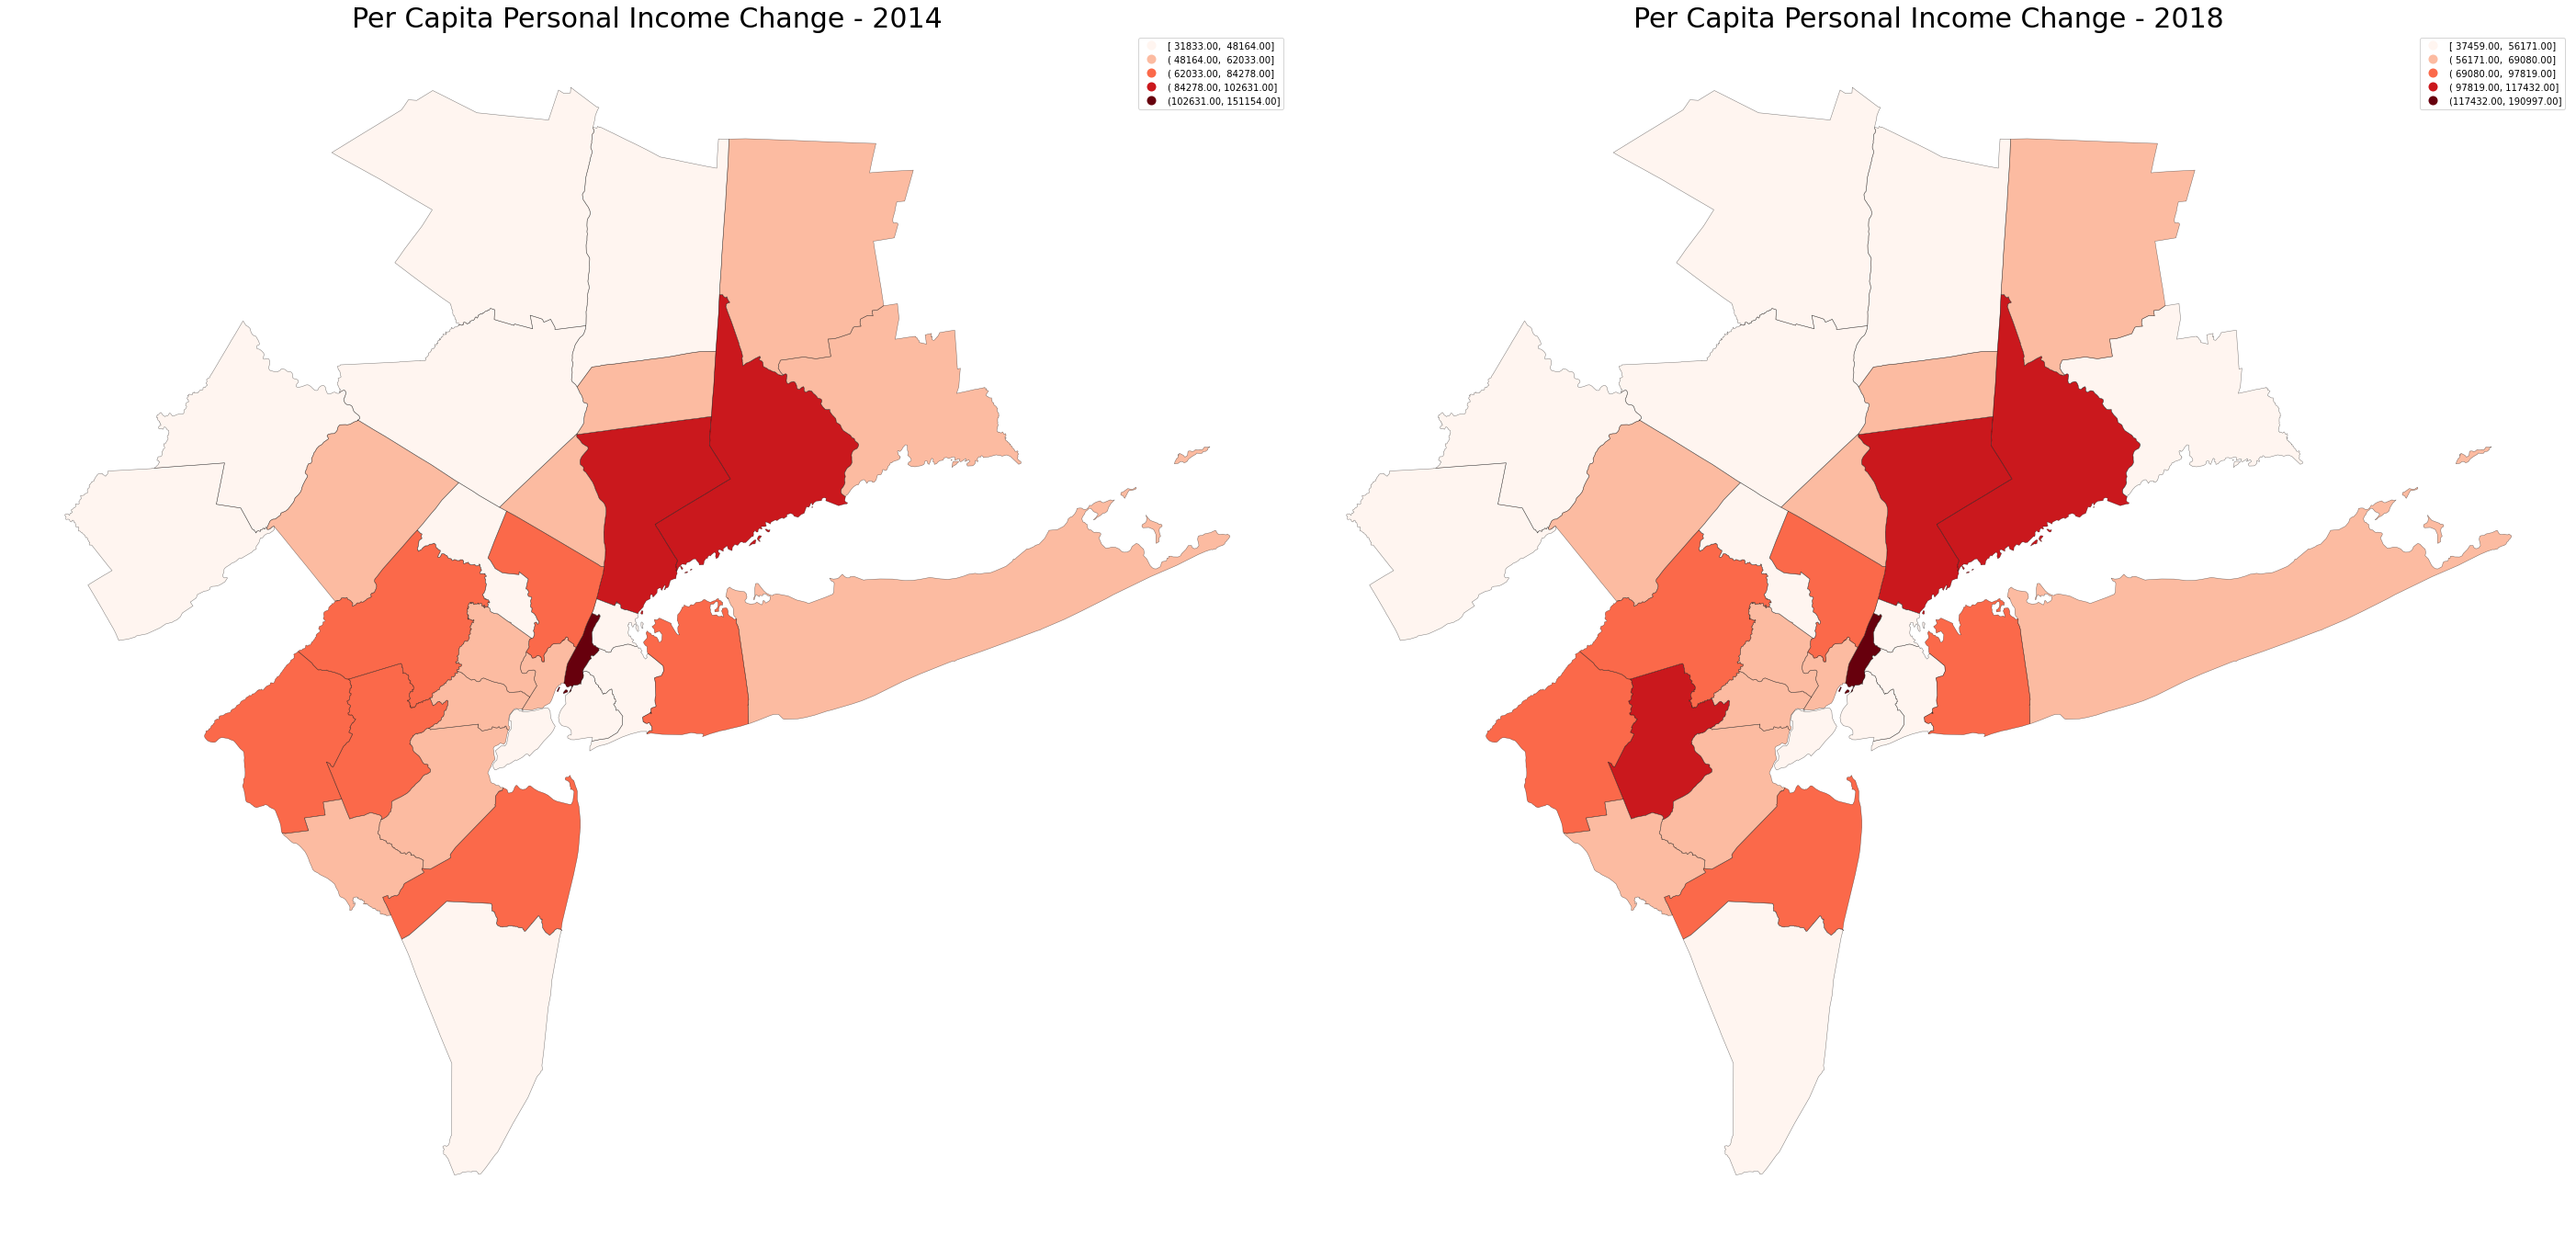

In [82]:
# Make a map to show the findings from both year

fig, axs = plt.subplots(1,2, figsize=(50, 30))
ax1, ax2 = axs
NYCMetro_income_sorting.plot(ax=ax1,
                          scheme='natural_breaks',
                          cmap='Reds',
                          column = '2014', 
                          legend=True
                          )

county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.5,
                                                                        alpha=0.5)
ax1.axis("off")
ax1.set_title("Per Capita Personal Income Change - 2014",fontsize = 30)

NYCMetro_income_sorting.plot(ax=ax2,
                          scheme='natural_breaks',
                          cmap='Reds',
                          column = '2018', 
                          legend=True
                          )

county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax2,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.5,
                                                                        alpha=0.5)

ax2.axis("off")
ax2.set_title("Per Capita Personal Income Change - 2018",fontsize = 30)
plt.subplots_adjust(wspace = 0)


In [83]:
# Create a new dataframe for the top 5 and the bottom 5

NYCMetro_income_top5andbottom5 = NYCMetro_income_sorting.iloc[np.r_[0:5, -5:0]]
NYCMetro_income_top5andbottom5

GEOID                                           geometry  \
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   

                County_Name    2014    2018  Difference  Difference_Percentage  
4           Kings, New York   41637   53346       11709                     28  
19       New York, New York  151154  190997       39843                     26  
28       Hudson, New Jersey   52840   66705       13865                     26  
10     Somerset, New Jersey   83429  105161       21732                     26  
5          Queens, New York   41377   50279        8902                     22  
2         Essex, New Jersey   58487   65214        6727                     12  
7        Mercer, New Jersey   62033   69080        7047                     11  
0    New Haven, Connecticut   50298   55779        5481                     11  
21  Litchfield, Connecticut   56864   62875        6011                     11  
18      Passaic, New Jersey   45765   50071        4306                      9

<h2>
<code style="background:yellow;color:red">FINDING17: Top 5 and Bottm 5 of Per Capita Income Change - 2014 vs 2018
</code>
</h2>

In [84]:
# Create a bar chart to show those top areas

fig = px.bar(NYCMetro_income_top5andbottom5, 
             x=NYCMetro_income_top5andbottom5['Difference_Percentage'],
             y=NYCMetro_income_top5andbottom5['County_Name'],
             color=NYCMetro_income_top5andbottom5['Difference_Percentage'], 
             orientation="h",
             color_continuous_scale='Bluered_r',
            title='Top 5 and Bottm 5 of Per Capita Income Change - 2014 vs 2018'
      )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:604: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



Text(0.5, 1.0, 'The Income Change Percentage - 2014 vs 2018')

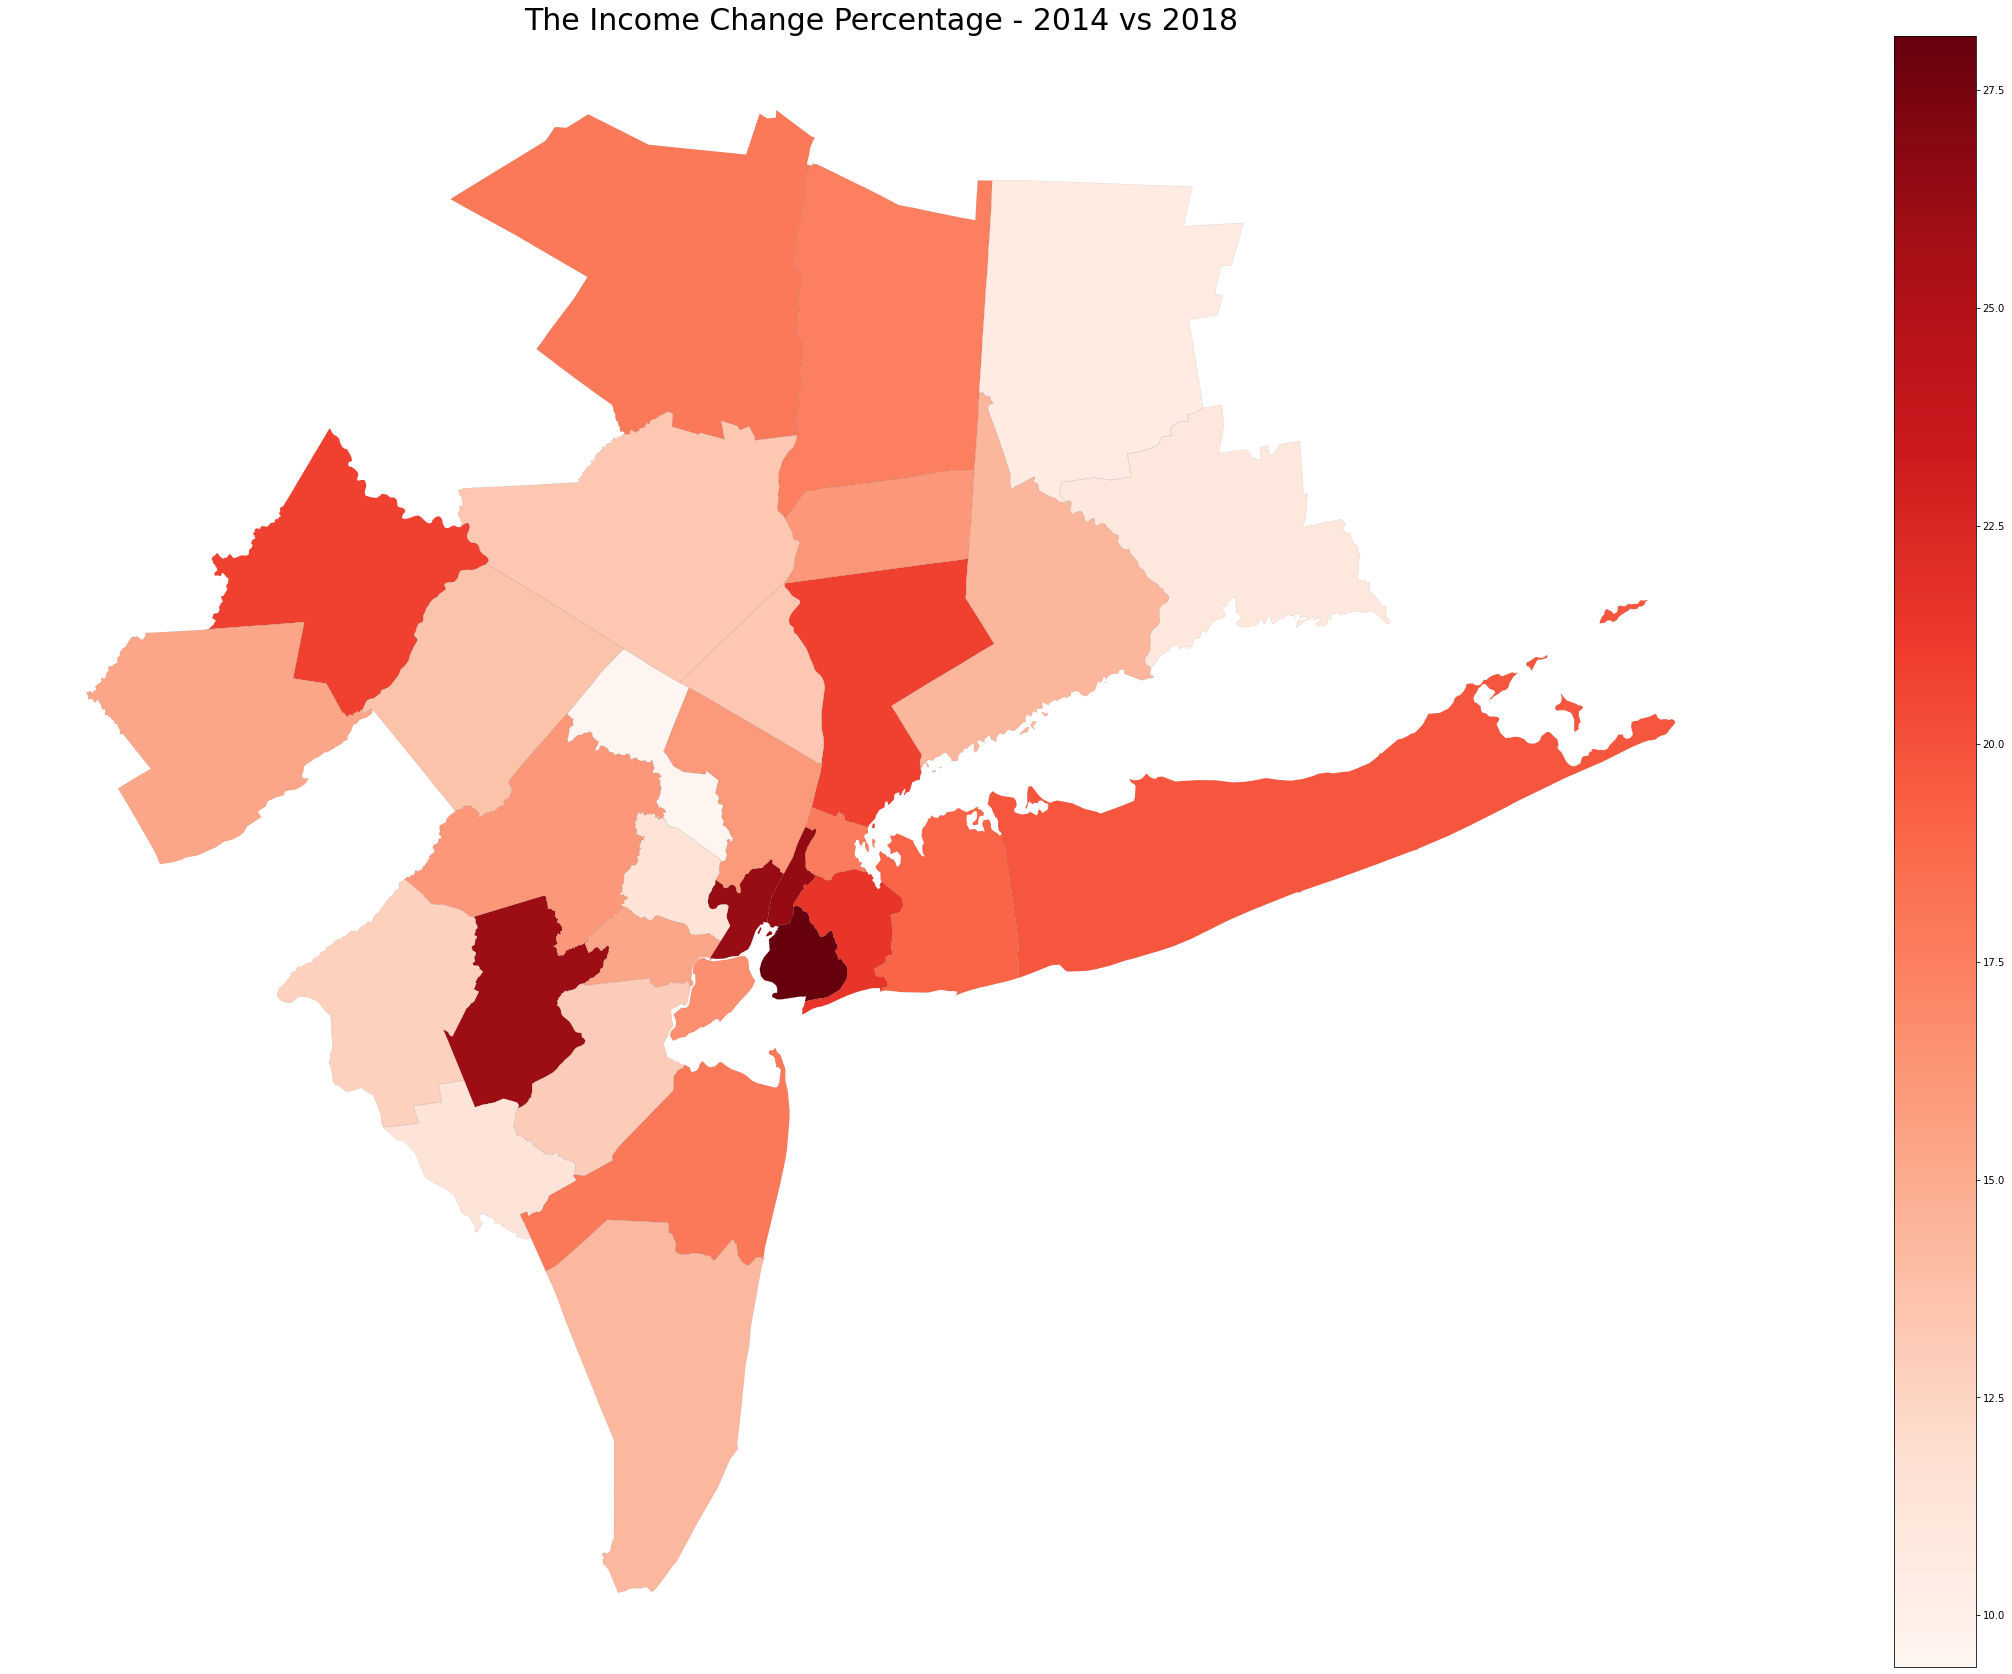

In [85]:
# Create a subplot to show the percentage

fig, axs = plt.subplots(1, 1, figsize=(50, 30))
ax1 = axs

NYCMetro_income_sorting[NYCMetro_income_sorting['Difference_Percentage']>0].plot(ax=ax1,
                          cmap='Reds',
                          column = 'Difference_Percentage', 
                          legend=True
                          )

NYCMetro_income_sorting[NYCMetro_income_sorting['Difference_Percentage']<0].plot(ax=ax1,
                          facecolor='skyblue',
                          legend=True
                          )
county_geodata_ready[county_geodata_ready.Region == 'NYC_Metro'].plot(ax=ax1,
                                                                       facecolor='none',
                                                                       edgecolor='black',
                                                                        lw=0.25,
                                                                        alpha=0.2)
ax1.axis("off")
ax1.set_title("The Income Change Percentage - 2014 vs 2018",fontsize = 30)



<h2>
<code style="background:grey;color:black">Section 4. Combine All Data for Future Uses
</code>
</h2>

In this section, I will combine my findings from the previuos sections so that I can share those findings with my partner for the next step. 

I will combine all census data only because then I can save to CSV instead of geo data type. My partner also has a geo data so that she can easily merge if needed.

In [86]:
# First, I clean the dataset to leave it as the min required info by dropping some columns and renaming some

migration_trimmed = out_migration_regionalscale2014vs2018_sortingbypercentage.drop(['Region','geometry','Region','2014_Population','2018_Population'],axis=1)

migration_trimmed.columns = ['GEOID','County_Name','Migration_2014','Migration_2018','Migration_Difference','Migration_Percentage10000%']

migration_trimmed

GEOID              County_Name  Migration_2014  Migration_2018  \
2   34017       Hudson, New Jersey           7,683          10,532   
19  42103       Pike, Pennsylvania             138             356   
9   36027       Dutchess, New York           2,373           3,520   
0   36059         Nassau, New York          16,513          21,286   
4   34013        Essex, New Jersey           4,010           6,421   
3   36119    Westchester, New York          14,643          17,355   
7   36085       Richmond, New York           5,465           6,735   
11  34021       Mercer, New Jersey             614           1,559   
10  36071         Orange, New York           2,635           3,582   
13  36087       Rockland, New York           2,040           2,761   
8   34039        Union, New Jersey           2,521           3,722   
6   34003       Bergen, New Jersey           5,046           6,405   
17  36111         Ulster, New York           1,557           1,818   
5   36103        Suffolk, New York           7,331           9,179   
1   36047          Kings, New York          33,206          36,341   
16  34035     Somerset, New Jersey             245             551   
12  09001   Fairfield, Connecticut           5,734           6,535   
15  34025     Monmouth, New Jersey           3,138           3,546   
14  09009   New Haven, Connecticut           2,005           2,511   
22  42089     Monroe, Pennsylvania           1,406           1,486   
18  34023    Middlesex, New Jersey           2,621           2,876   
21  34027       Morris, New Jersey           1,107           1,208   
23  34031      Passaic, New Jersey           1,311           1,366   
20  36081         Queens, New York          29,565          29,775   
24  09005  Litchfield, Connecticut             235             208   
25  34019    Hunterdon, New Jersey             159             107   
28  34029        Ocean, New Jersey           1,720           1,349   
26  34037       Sussex, New Jersey             291              66   
27  36079         Putnam, New York             962             656   
30  36061       New York, New York          31,890          25,180   
29  36005          Bronx, New York          30,346          24,135   

    Migration_Difference  Migration_Percentage10000%  
2                  2,849                          43  
19                   218                          39  
9                  1,147                          39  
0                  4,773                          35  
4                  2,411                          30  
3                  2,712                          28  
7                  1,270                          27  
11                   945                          26  
10                   947                          25  
13                   721                          22  
8                  1,201                          22  
6                  1,359                          15  
17                   261                          15  
5                  1,848                          12  
1                  3,135                          12  
16                   306                           9  
12                   801                           8  
15                   408                           7  
14                   506                           6  
22                    80                           5  
18                   255                           3  
21                   101                           2  
23                    55                           1  
20                   210                           1  
24                   -27                          -1  
25                   -52                          -4  
28                  -371                          -6  
26                  -225                         -16  
27                  -306                         -31  
30                -6,710                         -41  
29                -6,211                         -43

In [87]:
# Simiarlly, I will clean the GDP dataset as well by dropping and renaming the columns

GDP_trimmed = NYCMetro_GDP_sorting.drop(['geometry','County_Name'],axis=1)

GDP_trimmed.columns = ['GEOID','GDP_2014','GDP_2018','GDP_Difference','GDP_Percentage100%']

GDP_trimmed

GEOID   GDP_2014   GDP_2018  GDP_Difference  GDP_Percentage100%
4   36047   82801331  109288343        26487012                  32
5   36081   89191574  112038902        22847328                  26
24  36085   13598070   17019449         3421379                  25
27  36005   40720621   50495114         9774493                  24
19  36061  604156655  740092291       135935636                  23
28  34017   42372356   51850524         9478168                  22
20  36071   15162078   18378918         3216840                  21
10  34035   33153836   40134274         6980438                  21
15  42089    5984737    7059835         1075098                  18
12  36119   70838932   83040144        12201212                  17
13  42103    1169292    1356361          187069                  16
7   34021   29427286   33882823         4455537                  15
29  36111    6392016    7353496          961480                  15
11  36103   81758730   93814566        12055836                  15
16  36059   83779296   95928266        12148970                  15
22  36079    3171650    3626543          454893                  14
2   34013   50749112   57829253         7080141                  14
0   09009   46955517   53258214         6302697                  13
3   34023   55939149   63393253         7454104                  13
25  36027   12379523   14011783         1632260                  13
1   34003   68259852   76957265         8697413                  13
8   34025   31414671   35302280         3887609                  12
9   34029   18897939   20741214         1843275                  10
14  09001   82695041   90679271         7984230                  10
17  34027   48962031   53493850         4531819                   9
26  34039   36528012   39576386         3048374                   8
23  34037    4559504    4878958          319454                   7
6   34019    7106519    7479741          373222                   5
21  09005    8012662    8431142          418480                   5
18  34031   22443730   23261529          817799                   4
30  36087   17640497   17549815          -90682                  -1

In [88]:
# Also simiarlly, I clean the employment census dataset

JobNumber_trimmed = NYCMetro_employment_rawdata_sorting.drop(['geometry','County_Name'],axis=1)

JobNumber_trimmed.columns = ['GEOID','JobNumber_2014','JobNumber_2018','JobNumber_Difference','JobNumber_Percentage100%']

JobNumber_trimmed

GEOID  JobNumber_2014  JobNumber_2018  JobNumber_Difference  \
4   36047         1003901         1191532                187631   
5   36081          929870         1058488                128618   
28  34017          336189          380203                 44014   
3   34023          511588          571701                 60113   
9   34029          243243          269426                 26183   
24  36085          166342          183600                 17258   
30  36087          164056          176471                 12415   
27  36005          446208          478475                 32267   
10  34035          244449          261980                 17531   
8   34025          374889          400536                 25647   
19  36061         2925470         3117139                191669   
20  36071          186300          198319                 12019   
7   34021          272638          290138                 17500   
15  42089           73902           78544                  4642   
17  34027          386622          410112                 23490   
16  36059          870361          921168                 50807   
2   34013          463337          489809                 26472   
13  42103           18224           19158                   934   
26  34039          312146          327748                 15602   
12  36119          605383          633249                 27866   
11  36103          861620          899618                 37998   
1   34003          639103          666371                 27268   
25  36027          150116          156157                  6041   
29  36111           88656           92069                  3413   
22  36079           40508           41787                  1279   
18  34031          238438          245734                  7296   
0   09009          496755          511150                 14395   
14  09001          646561          663549                 16988   
6   34019           75924           77193                  1269   
23  34037           62109           62559                   450   
21  09005           97167           96629                  -538   

    JobNumber_Percentage100%  
4                         19  
5                         14  
28                        13  
3                         12  
9                         11  
24                        10  
30                         8  
27                         7  
10                         7  
8                          7  
19                         7  
20                         6  
7                          6  
15                         6  
17                         6  
16                         6  
2                          6  
13                         5  
26                         5  
12                         5  
11                         4  
1                          4  
25                         4  
29                         4  
22                         3  
18                         3  
0                          3  
14                         3  
6                          2  
23                         1  
21                        -1

In [89]:
# Then, clean the income census dataset

income_trimmed = NYCMetro_income_sorting.drop(['geometry','County_Name'],axis=1)

income_trimmed.columns = ['GEOID','Income_2014','Income_2018','Income_Difference','Income_Percentage100%']

income_trimmed

GEOID  Income_2014  Income_2018  Income_Difference  Income_Percentage100%
4   36047        41637        53346              11709                     28
19  36061       151154       190997              39843                     26
28  34017        52840        66705              13865                     26
10  34035        83429       105161              21732                     26
5   36081        41377        50279               8902                     22
12  36119        90438       109324              18886                     21
13  42103        39534        47775               8241                     21
11  36103        57496        68868              11372                     20
16  36059        75393        89711              14318                     19
8   34025        67392        79471              12079                     18
29  36111        42912        50590               7678                     18
27  36005        31833        37459               5626                     18
25  36027        47551        55911               8360                     18
24  36085        48164        56171               8007                     17
22  36079        57173        66396               9223                     16
17  34027        84278        97819              13541                     16
1   34003        74480        86404              11924                     16
26  34039        59259        68313               9054                     15
15  42089        36666        42267               5601                     15
14  09001       102631       117432              14801                     14
9   34029        44951        51353               6402                     14
23  34037        53814        61156               7342                     14
30  36087        53442        60568               7126                     13
20  36071        45317        51343               6026                     13
3   34023        53964        61012               7048                     13
6   34019        78575        88565               9990                     13
2   34013        58487        65214               6727                     12
7   34021        62033        69080               7047                     11
0   09009        50298        55779               5481                     11
21  09005        56864        62875               6011                     11
18  34031        45765        50071               4306                      9

In [90]:
#Lastly, I will combine all dataset together by GEOID, the identifier

NYCMETRO_Combined_Data_2014vs2018 = migration_trimmed.merge(GDP_trimmed,
                                                            on='GEOID',
                                                            how='left')

NYCMETRO_Combined_Data_2014vs2018 = NYCMETRO_Combined_Data_2014vs2018.merge(JobNumber_trimmed,
                                                                            on='GEOID',
                                                                            how='left')

NYCMETRO_Combined_Data_2014vs2018 = NYCMETRO_Combined_Data_2014vs2018.merge(income_trimmed,
                                                                            on='GEOID',
                                                                            how='left')

In [91]:
# I want to take a look to see if it works

NYCMETRO_Combined_Data_2014vs2018.head()

GEOID         County_Name  Migration_2014  Migration_2018  \
0  34017  Hudson, New Jersey           7,683          10,532   
1  42103  Pike, Pennsylvania             138             356   
2  36027  Dutchess, New York           2,373           3,520   
3  36059    Nassau, New York          16,513          21,286   
4  34013   Essex, New Jersey           4,010           6,421   

   Migration_Difference  Migration_Percentage10000%  GDP_2014  GDP_2018  \
0                 2,849                          43  42372356  51850524   
1                   218                          39   1169292   1356361   
2                 1,147                          39  12379523  14011783   
3                 4,773                          35  83779296  95928266   
4                 2,411                          30  50749112  57829253   

   GDP_Difference  GDP_Percentage100%  JobNumber_2014  JobNumber_2018  \
0         9478168                  22          336189          380203   
1          187069                  16           18224           19158   
2         1632260                  13          150116          156157   
3        12148970                  15          870361          921168   
4         7080141                  14          463337          489809   

   JobNumber_Difference  JobNumber_Percentage100%  Income_2014  Income_2018  \
0                 44014                        13        52840        66705   
1                   934                         5        39534        47775   
2                  6041                         4        47551        55911   
3                 50807                         6        75393        89711   
4                 26472                         6        58487        65214   

   Income_Difference  Income_Percentage100%  
0              13865                     26  
1               8241                     21  
2               8360                     18  
3              14318                     19  
4               6727                     12

In [92]:
## The last step is to save it as a CSV file for future use.

NYCMETRO_Combined_Data_2014vs2018.to_csv('save/NYCMETRO_Combined_Data_2014vs2018.csv')

<h2>
<code style="background:grey;color:black">Section 4. Conclusion
</code>
</h2>

In this notebook, I am able to do data cleanning, sorting, filtering, and processing for the findings of migration pattern and various economic metric changes. The resulted maps, tables, and CSV files are good for the next step. 